## Load packages

In [40]:
import numpy as np
import os
import matplotlib.pyplot as plt
import csv

## Load and show data

### Matrices


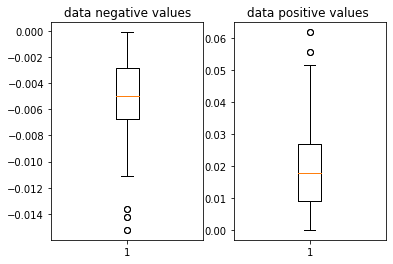

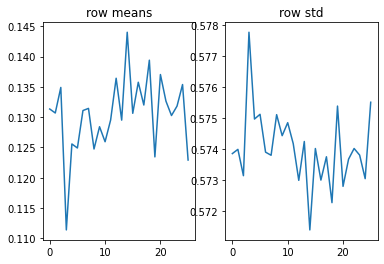

<Figure size 432x288 with 0 Axes>

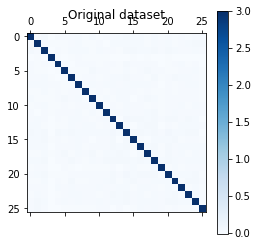

In [41]:
# Load CSV files
ISC_EEG = np.genfromtxt(os.path.join('ISC_EEG.csv'),delimiter=',')
ISC_EEG = np.array(ISC_EEG,dtype='float') # Convert into array

ISC_EDA = np.genfromtxt(os.path.join('ISC_EDA.csv'),delimiter=',')
ISC_EDA = np.array(ISC_EDA,dtype='float') # Convert into array

ISC_IBI = np.genfromtxt(os.path.join('ISC_IBI.csv'),delimiter=',')
ISC_IBI = np.array(ISC_IBI,dtype='float') # Convert into array

# Seeing if negative data have same order of magnitude as positive data 
def orderOfMagnitude(matrix):
    for i in range(len(matrix)):
        matrix[i,i] = 0
    
    neg = matrix[matrix<0]
    plt.subplot(121)
    plt.boxplot(neg)
    plt.title("data negative values")
    
    pos = matrix[matrix>0]
    plt.subplot(122)
    plt.boxplot(pos)
    plt.title("data positive values ")
    
# Remove outlier in array if we find one
def removeOutlierArray(matrix,subject):
    new_mat = np.copy(matrix)
    new_mat = np.delete(new_mat, (subject), axis=0)
    new_mat = np.delete(new_mat, (subject), axis=1)
    
    with open(os.path.join('ISC_truncated.csv'), 'w') as File:
        writer = csv.writer(File,delimiter =';')
        writer.writerows(matrix)
    
    return new_mat

# Remove outlier in vector if we find one
def removeOutlierVector(vector,subject):
    new_vect = np.copy(vector)
    new_vect = np.delete(new_vect, (subject), axis=0)
    return new_vect

# Remove outlier in points if we find one
def removeOutlierPoints(points,subject):
    new_points = np.copy(points)
    new_points = np.delete(new_points, (subject), axis=0)
    
    return new_points

# Remove Inf in data for EDA and IBI (replace by sort of normalisation for the moment)
tmp_EEG = np.copy(ISC_EEG)
tmp_EDA = np.copy(ISC_EDA)
tmp_IBI = np.copy(ISC_IBI)

for i in range(len(tmp_EEG)):
    tmp_EEG[i,i] = 0
    tmp_EDA[i,i] = 0
    tmp_IBI[i,i] = 0
eegNorm = 3/np.mean(tmp_EEG)

for i in range(len(ISC_IBI)):
    ISC_IBI[i,i] = np.mean(tmp_IBI)*eegNorm
    ISC_EDA[i,i] = np.mean(tmp_EDA)*eegNorm
        
# Choose matrix to study
case = 'EEG'
removeOutlier = False # Remove outliers if there are some

if (case == 'EEG'):
    if (removeOutlier): # Remove outliers if there are some
        ISC_EEG = removeOutlierArray(ISC_EEG,3) # Really outlier?
    study_matrix = ISC_EEG
elif (case == 'EDA'):
    if (removeOutlier): # Remove outliers if there are some
        #ISC_EDA = removeOutlierArray(ISC_EDA,12) # Really outlier?
        #ISC_EDA = removeOutlierArray(ISC_EDA,20) # Really outlier?
        ISC_EDA = removeOutlierArray(ISC_EDA,17)
    study_matrix = ISC_EDA
elif (case == 'IBI'):
    if (removeOutlier): # Remove outliers if there are some
        print("Haven't found any outliers for the moment")
        # ISC_IBI = removeOutlierArray(ISC_IBI,)
    study_matrix = ISC_IBI

N = len(study_matrix)

# Boxplot
orderOfMagnitude(np.copy(study_matrix))

# Normalize rows and columns ?
    
# Remove negative values from EDA and IBI
#study_matrix = np.where(study_matrix>0,study_matrix,0)

plt.figure()
plt.subplot(121)
plt.plot(np.mean(study_matrix,axis=0))
plt.title('row means')
plt.subplot(122)
plt.plot(np.std(study_matrix,axis=0))
plt.title('row std')

# Show matrix data
plt.figure()
plt.matshow(study_matrix, cmap=plt.cm.Blues)
plt.title("Original dataset")
plt.colorbar()
plt.show()

### True groups

In [42]:
# Load true clusters
condition = np.genfromtxt(os.path.join('condition.csv'),delimiter=',')
condition = np.array(condition,dtype='int') # Convert into array
if (removeOutlier): # Remove outliers if there are some
    if (case == 'EEG'):
        condition = removeOutlierVector(condition,3) # Really outlier?
    elif (case == 'EDA'):
        #condition = removeOutlierVector(condition,12) # Really outlier?
        #condition = removeOutlierVector(condition,20) # Really outlier?
        condition = removeOutlierVector(condition,17) # Really outlier?
    elif (case == 'IBI'):
        print("Haven't found any outliers for the moment")
        # condition = removeOutlierVector(condition,) # Really outlier?

narrative = np.where(condition == 0)[0]
stimulus = np.where(condition == 1)[0]

conditionShuffle = np.random.shuffle(np.copy(condition))
#conditionShuffle = np.zeros_like(condition)
'''
narrative = np.array([ 0 , 2 , 4 , 5 , 7 , 9, 11 ,13 ,16 ,17 ,18 ,22 ,25])
stimulus = np.array([ 1,  3,  6 , 8 ,10 ,12 ,14 ,15 ,19 ,20 ,21, 23, 24])
condition = np.genfromtxt(os.path.join('condition.csv'),delimiter=',')
condition = np.array(condition,dtype='int') # Convert into array
conditionShuffle = np.zeros(N)
'''

"\nnarrative = np.array([ 0 , 2 , 4 , 5 , 7 , 9, 11 ,13 ,16 ,17 ,18 ,22 ,25])\nstimulus = np.array([ 1,  3,  6 , 8 ,10 ,12 ,14 ,15 ,19 ,20 ,21, 23, 24])\ncondition = np.genfromtxt(os.path.join('condition.csv'),delimiter=',')\ncondition = np.array(condition,dtype='int') # Convert into array\nconditionShuffle = np.zeros(N)\n"

### Compute distance matrix

In [43]:
# rank of elements 
def rankify(A): 
  
    # Rank Vector 
    R = [0 for x in range(len(A))] 
  
    # Sweep through all elements 
    # in A for each element count 
    # the number of less than and  
    # equal elements separately 
    # in r and s. 
    for i in range(len(A)): 
        (r, s) = (1, 1) 
        for j in range(len(A)): 
            if j != i and A[j] < A[i]: 
                r += 1
            if j != i and A[j] == A[i]: 
                s += 1       
         
        # Use formula to obtain rank 
        R[i] = r + (s - 1) / 2
  
    # Return Rank Vector 
    return R

In [44]:
import scipy.spatial.distance as ssd

def computeDistanceMatrix(normalisation=1,addCoef=0,uncondensed=False,euclideanTransform=True,finalNorm=False,rank=False,keepDiag=True,study_matrix=study_matrix): # Choose normalisation between 1 and 45, 
                                            # 45 means bigger non diagonal correlations almost 1
    matrix_norm = np.copy(study_matrix)
    if (keepDiag==False):
        for i in range(N):
            matrix_norm[i,i] = 0
    maxi = np.max(abs(matrix_norm)) # Max value except from the diagonal

    for i in range(N):
        matrix_norm[i,i] = maxi*normalisation

    # Normalise max value to 1
    matrix_norm = matrix_norm / np.max(abs(matrix_norm))

    # Convert into distance matrix
    if (euclideanTransform):
        distance_matrix = np.sqrt(2*N*(1-matrix_norm))
        # distance_matrix = np.sqrt((1-matrix_norm)) # Formula in Matlab and in Scikit (?) to convert 
    else:
        distance_matrix = 1-matrix_norm
        
    # Check if bad construction
    for i in range(len(study_matrix)):
        if (distance_matrix[i,i]!=0):
            raise ValueError('Bad construction of distance matrix, not zero on diagonal')
            
    tmp_distance_matrix = np.copy(distance_matrix)
    
    for i in range(len(study_matrix)):
        tmp_distance_matrix[i,i]=1 # Change diagonal to be different from zero
    if (np.min(tmp_distance_matrix)==0):
        raise ValueError('Bad construction of distance matrix, zero outside diagonal')
        #print('Bad construction of distance matrix, zero outside diagonal')
    
    # Normalisation to avoid negative eigen values in PCoA
    distance_matrix = distance_matrix + addCoef
    for i in range(len(study_matrix)):
        distance_matrix[i,i] = 0
    
    # Transform matrix into uncondensed matrix
    if (uncondensed):
        distance_matrix = ssd.squareform(distance_matrix)
        
    # Transform matrix into rank matrix
    if (rank):
        rank_matrix = np.zeros_like(distance_matrix)
        for i in range(N):
            rank_matrix[i,:] = rankify(distance_matrix[i,:])
        return rank_matrix
        
    ## Write new CSV file with all data
    if (uncondensed==False):
        with open(os.path.join('dist_'+ case + '.csv'), 'w') as File:
            writer = csv.writer(File,delimiter =';')
            writer.writerows(distance_matrix)
            
    if (finalNorm):
        distance_matrix = distance_matrix / np.std(distance_matrix) 

    return distance_matrix
    
'''
# Normalise data
for i in range(N):
    matrix[:,i] = (matrix[:,i] - np.mean(matrix[:,i])) / np.std(matrix[:,i])
'''

'\n# Normalise data\nfor i in range(N):\n    matrix[:,i] = (matrix[:,i] - np.mean(matrix[:,i])) / np.std(matrix[:,i])\n'

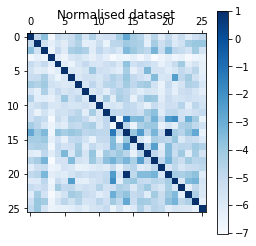

In [45]:
norm_coef = 1
add_coef = 0
distance_matrix = computeDistanceMatrix(1.0001,addCoef=0,keepDiag=False) # Choose between 1 and 45, 
                                            # 45 means bigger non diagonal correlations almost 1

study_matrix_norm = 1-(distance_matrix-add_coef)
for i in range(len(study_matrix)):
    study_matrix_norm[i,i] = 1

plt.matshow(study_matrix_norm, cmap=plt.cm.Blues)
plt.title("Normalised dataset")
plt.colorbar()
plt.show()

### Silhouette coefficient (SC)

In [46]:
from sklearn.metrics import silhouette_score

# Compute DB-score based on distance matrix(small means good clustering)
def silhouetteCoef(distance_matrix,label,metric='precomputed'):
    return silhouette_score(distance_matrix, label, metric=metric)

accuracyVect = np.array([])
SCVect = np.array([])
methodUsed = np.array([])
prior = np.array([])

## Bloc modelling / Bi-clustering

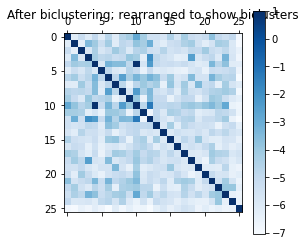

In [47]:
from sklearn.cluster import SpectralCoclustering

# Fit the model
cocluster = SpectralCoclustering(n_clusters=2, random_state=0)
cocluster.fit(study_matrix_norm)
'''
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.3f}".format(score))
'''
fit_data = study_matrix_norm[np.argsort(cocluster.row_labels_)]
fit_data = fit_data[:, np.argsort(cocluster.column_labels_)]

# Show results
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
plt.colorbar()
plt.show()

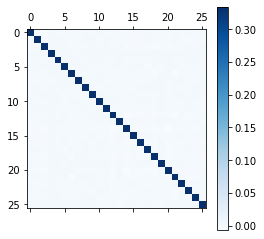

In [48]:
# Show matrix inverse (decorrelation?)
decorr = np.linalg.inv(study_matrix)

plt.matshow(decorr, cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

## Defining result class

In [85]:
from sklearn.metrics import davies_bouldin_score,adjusted_rand_score

class Results():

    def __init__(self,name,random_init,sslLabel=None):
        self.accuracy = np.zeros((int(N/4)+2,len(coefficients)))
        self.best_accuracy = 0
        self.best_dim = 0
        self.best_norm = 0
        self.label = np.zeros(N)
        self.probaLabel = np.zeros(N)
        self.wellClassified = None
        self.wrongClassified = None
        self.name = name
        self.random_init = random_init
        self.best_points = None
        self.SC = -1
        self.sslLabel = sslLabel
        self.allLabel = []
        
    def thresholdLabel(self):
        self.label = np.where(self.probaLabel<0.5,0,1)
    
    def initCenters(self,NA_ref,SSA_ref,points):
        dim = points.shape[1]
        init = np.zeros((dim,2))
        init[:,0] = np.mean(points[NA_ref,:],axis=0)
        init[:,1] = np.mean(points[SSA_ref,:],axis=0)
        return init.T
        
    def twoClustersMethodResult(self):
        print("Results\n")
        if (random_init==False):
            print("Best dimension %d (7 means t-SNE)" %self.best_dim)
            print("Best normalisation %d " %self.best_norm)
        print("Found clusters ")
        print(self.label)
        print("True clusters ")
        print(condition)
        self.trueWrongClusters(self.label,condition)
        print("Well classified")
        print(self.wellClassified)
        print("Wrong classified")
        print(self.wrongClassified)
        self.best_accuracy = np.max(self.accuracy)
        print("Best %s accuracy : %f" %(self.name,self.best_accuracy))
        print("Silhouette coefficient : %0.3f" %self.SC)
        if (self.random_init):
            self.findRobustParticipants()
        
    def trueWrongClusters(self,label,condition):
        subjects = np.arange(0,N)
        self.wellClassified = subjects[label==condition]
        self.wrongClassified = subjects[label!=condition]
        
    def findRobustParticipants(self):
        robustness = 0.7
        self.robustLabel = np.where((self.probaLabel<=(1-robustness))+(self.probaLabel>=robustness),1,0)
        print("Robust participants")
        print(self.robustLabel)
        print(subjects[self.robustLabel==1])
        print("Frequencies")
        print(self.probaLabel)
        
    def applyMethod(self,method,dim=np.arange(1,int(N/4)+2)):
        print("Computing clustering\n")
        for p in range(len(coefficients)):
            print(str(int(p*100/len(coefficients))) + "%")
            distance_matrix = computeDistanceMatrix(normalisation=coefficients[p],addCoef=add_coef)

            for i in dim: # Negative means PCoA, 7 means t-SNE, range(1,6) means metric MDS
                self.best_points = np.zeros((N,abs(i)))
                if (isinstance(self,MapMethodResults)):
                    if (i<0):
                        points = computePCoACoordinate(distance_matrix,n_comp=abs(i))
                    elif (i<int(N/4)+1):
                        points,stress,disparities = computeMDSCoordinate(distance_matrix,i)
                    elif (i==7):
                        points = computeSNECoordinate(distance_matrix)
                    else:
                        points = computeUMAPCoordinate(distance_matrix)
                    if hasattr(method, 'init'):
                        if hasattr(method.init, 'shape'):
                            method.init = self.initCenters(NA_HC,SSA_HC,points)
                    if (self.sslLabel is None):
                        meth = method.fit(points)
                    else:
                        meth = method.fit(points,self.sslLabel)
                else:
                    meth = method.fit(distance_matrix)
                    
                if hasattr(meth, 'labels_'):
                    label = meth.labels_
                else:
                    label = meth.predict(points)
                
                acc = sum(condition==label)/N
                accShuffle = sum(conditionShuffle==label)/N
                if (accShuffle<0.5):
                    label = 1-label
                    self.accuracy[i-1,p] = 1-acc
                else:
                    self.accuracy[i-1,p] = acc
                
                if self.accuracy[i-1,p] == np.max(self.accuracy):
                    self.label = label
                    self.best_dim = i
                    self.best_norm = coefficients[p]
                    if (isinstance(self,MapMethodResults)):
                        self.best_points = points
                        self.SC = silhouetteCoef(self.best_points,self.label,metric='euclidean')
                    else:
                        self.SC = silhouetteCoef(distance_matrix,self.label,metric='precomputed')
        
    def applyMethodAverage(self,method,coef,dim=2,n_run=1,verbose=True):
        print("Computing clustering\n")
        self.best_points = np.zeros((N,dim))
        self.best_dim = dim
        distance_matrix = computeDistanceMatrix(normalisation=coef,addCoef=add_coef)
        for k in range(n_run):
            if (verbose):
                print(str(int(k*100/n_run)) + "%")
            if (isinstance(self,MapMethodResults)):
                if (dim<int(N/4)+1):
                    points = computePCoACoordinate(distance_matrix,n_comp=dim)
                else:
                    points = computeSNECoordinate(distance_matrix)
                if hasattr(method, 'init'):
                    if hasattr(method.init, 'shape'):
                        method.init = self.initCenters(NA_HC,SSA_HC,points)
                meth = method.fit(points)
            else:
                meth = method.fit(distance_matrix)

            if hasattr(meth, 'labels_'):
                label = meth.labels_
            else:
                label = meth.predict(points)
            label = np.array(label,dtype='float64')

            acc = sum(condition==label)/N
            #accShuffle = sum(conditionShuffle==label)/N
                        
            label = self.reverseLabel(label)
 
            self.probaLabel += label/n_run
        self.thresholdLabel()
        if (isinstance(self,MapMethodResults)):
            self.best_points = points
            self.SC += silhouetteCoef(self.best_points,self.label,metric='euclidean')/n_run
        else:
            self.SC = silhouetteCoef(distance_matrix,self.label,metric='precomputed')/n_run

        acc = sum(condition==self.label)/N
        if (acc<0.5):
            self.accuracy[0,0] = 1-acc
        else:
            self.accuracy[0,0] = acc
            
    def reverseLabel(self,label):
        for i in range(len(self.allLabel)):
            if (np.array_equal(label,self.allLabel[i])):
                return label
            if (np.array_equal(1-label,self.allLabel[i])):
                return 1-label

        if (len(self.allLabel)==0):
            self.allLabel.append(label)
        else:
            tmpAcc = sum(self.allLabel[0]==label)/N
            if (tmpAcc<0.5):
                label = 1-label
            self.allLabel.append(label)
        return label

    def writeProbaLabel(self):
        probaLabel = np.zeros((N,2))
        probaLabel[:,0] = condition
        probaLabel[:,1] = self.probaLabel
        with open(os.path.join('probaClustering_' + case + '_dim' + str(self.best_dim) + '_' + self.name + '.csv'), 'w') as File:
            writer = csv.writer(File,delimiter =';')
            writer.writerows(probaLabel)
            
class DistanceMethodResults(Results):
    
    def __init__(self,name,random_init):
        Results.__init__(self,name,random_init)
        
class MapMethodResults(Results):
    
    def __init__(self,name,random_init,sslLabel=None):
        Results.__init__(self,name,random_init,sslLabel)
        
    def applyMethodAndMDSAverages(self,method,dim=2,coef=1,n_run=1,n_mds_run=1,verbose=True):
        print("Computing clustering\n")
        self.best_points = np.zeros((N,dim))
        self.best_dim = dim
        distance_matrix = computeDistanceMatrix(normalisation=coef,addCoef=add_coef)
        for i in range(n_mds_run):
            if (verbose):
                print(str(int(i*100/n_mds_run)) + "%")
            for k in range(n_run):
                if (isinstance(self,MapMethodResults)):
                    #points,stress,disparities = computeMDSCoordinate(distance_matrix,dim)
                    points = computeUMAPCoordinate(distance_matrix)
                    if (self.sslLabel is None):
                        meth = method.fit(points)
                    else:
                        meth = method.fit(points,self.sslLabel)
                else:
                    meth = method.fit(distance_matrix)
                
                if hasattr(meth, 'labels_'):
                    label = meth.labels_
                else:
                    label = meth.predict(points)
                label = np.array(label,dtype='float64')

                acc = sum(condition==label)/N
                '''
                accShuffle = sum(conditionShuffle==label)/N
                if (accShuffle<0.5):
                    label = 1-label
                '''
                label = self.reverseLabel(label)
                self.probaLabel += label/(n_run*n_mds_run)
            self.best_points += points
        self.thresholdLabel()
        self.SC = silhouetteCoef(self.best_points,self.label,metric='euclidean')

        acc = sum(condition==self.label)/N
        if (acc<0.5):
            self.accuracy[0,0] = 1-acc
        else:
            self.accuracy[0,0] = acc
        
    def clusteringAccuracyWithDimension(self):
        # Plot clustering accuracy with increasing dimension
        for p in range(len(coefficients)):
            plt.plot(np.arange(1,int(N/4)+3),self.accuracy[:,p],label=str(coefficients[p]))
        plt.xlabel("number of mds dimensions")
        plt.ylabel("%s accuracy" %self.name)
        plt.legend()
        
    def showResultMap(self):
        plt.figure()
        
        if (self.best_dim != 1):
            ax = plt.axes([0,0,1.2,1.2])
            ax.set_aspect(aspect='equal')
            for i in range(N):
                if (i in self.wellClassified):
                    if (condition[i] == 0):
                        color = 'blue'
                        label = 'NA'
                    else:
                        color = 'red'
                        label = 'SSA'
                else:
                    color = 'black'
                    label = 'misclassified'
                ax.annotate(i,(self.best_points[i,0],self.best_points[i,1]),xytext=(self.best_points[i,0]+np.max(self.best_points)/20,self.best_points[i,1]))
                ax.scatter(self.best_points[i,0],self.best_points[i,1],color=color,s=145,label=label)
        else:
            plt.scatter(self.best_points[narrative],np.zeros((len(narrative),1)),marker='x',color='blue')
            plt.scatter(self.best_points[stimulus],np.zeros((len(stimulus),1)),marker='x',color='red')
            orderedSubjectPlot = np.argsort(self.best_points.T)
            for i in range(N):
                subj = orderedSubjectPlot[0,i]
                plt.annotate(subj,(self.best_points[subj,0],0),xytext=(self.best_points[subj,0]-((i+1)%2+1)*np.max(self.best_points)/35,0.01*(i%2)-0.0065))
    
        TP = mpatches.Patch(color='blue', label='NA')
        TN = mpatches.Patch(color='red', label='SSA')
        FP_FN = mpatches.Patch(color='black', label='misclassified')
        plt.legend(handles=[TP,TN,FP_FN])
        plt.title("%s clustering" %self.name)
        
    def dbScore(self):
        # Compute DB-score (small means good clustering)
        return davies_bouldin_score(self.best_points,self.label)

In [86]:
# from ResultClass import Results

random_init = True # MDS with several random init
nRun = 4000 # Number of runs with different random init if random_init True

## Hierarchical clustering

### Hierarchical clustering based on correlation (diagonal normalised)

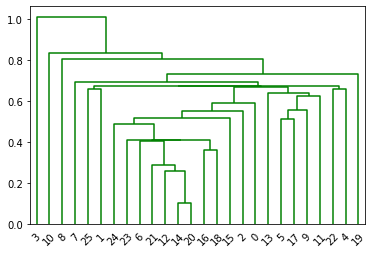

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z=linkage(study_matrix_norm,'single','correlation',optimal_ordering=True)
dendrogram(Z, color_threshold=1.035)
plt.show()

In [88]:
print("group 0 (NA) : ",narrative)
print("group 1 (SSA): ",stimulus)

group 0 (NA) :  [ 0  2  4  5  7  9 11 13 16 17 18 22 25]
group 1 (SSA):  [ 1  3  6  8 10 12 14 15 19 20 21 23 24]


### Hierarchical clustering based on euclidean distance

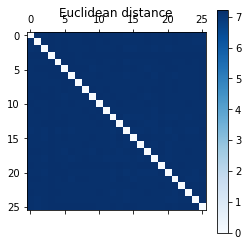

In [89]:
distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
plt.matshow(distance_matrix, cmap=plt.cm.Blues)
plt.title("Euclidean distance")
plt.colorbar()
plt.show()

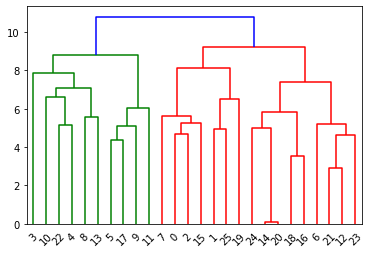

Found clusters 
[1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1]
True clusters 
[0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0]
Well classified
[ 1  4  5  6  9 11 12 13 14 15 17 19 20 21 22 23 24]
Wrong classified
[ 0  2  3  7  8 10 16 18 25]
Accuracy : 0.653846
Silhouette coefficient : 0.001


In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

distance_matrix = computeDistanceMatrix(1.0002,addCoef=0,uncondensed=True,keepDiag=False) # Normalisations do not affect HC
Z=linkage(distance_matrix,'ward','euclidean',optimal_ordering=True)
threshold = 4-0.2*(case=='EEG') # 3.8 EEG, 4 EDA, 4 IBI if add_coef ==2
threshold = 1.5*(case!='EDA')+11.75*(case=='EDA') # 1.4 or 1.5 EEG, 4 EDA, 4 IBI if no normalisation
threshold = 7.3*(case=='EEG') # 7.3 EEG if keepDiag==True
threshold = 10
dendrogram(Z, color_threshold=threshold)
plt.show()

print("Found clusters ")
label = (fcluster(Z, t=threshold, criterion='distance')-1)
label_HC = label
print(label)
print("True clusters ")
print(condition)

subjects = np.arange(0,N)
wellClassified = subjects[label==condition]
wrongClassified = subjects[label!=condition]
SSA_HC = subjects[label==1] # Maybe NA
NA_HC = subjects[label==0] # Maybe SSA
print("Well classified")
print(wellClassified)
print("Wrong classified")
print(wrongClassified)
accuracy = len(wellClassified)/N
print("Accuracy : %f" %accuracy)
#[ 0  2  3  7  8 10 16 18 25]
distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
SC = silhouetteCoef(distance_matrix,label)
print("Silhouette coefficient : %0.3f" %SC)
if 'HC' not in methodUsed:
    accuracyVect = np.append(accuracyVect,accuracy)
    SCVect = np.append(SCVect,SC)
    methodUsed = np.append(methodUsed,'HC')
    prior = np.append(prior,'dist')

In [91]:
'''
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None,affinity="precomputed",linkage='single').fit(distance_matrix)
plot_dendrogram(clustering)

print("Found clusters ")
label = clustering.labels_
print(label)
print("True clusters ")
print(condition)

subjects = np.arange(0,N)
wellClassified = subjects[label==condition]
wrongClassified = subjects[label!=condition]
SSA_HC = subjects[label==1] # Maybe NA
NA_HC = subjects[label==0] # Maybe SSA
print("Well classified")
print(wellClassified)
print("Wrong classified")
print(wrongClassified)
accuracy = len(wellClassified)/N
print("Accuracy : %f" %accuracy)
#[ 0  2  3  7  8 10 16 18 25]
distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
SC = silhouetteCoef(distance_matrix,label)
print("Silhouette coefficient : %0.3f" %SC)
'''

'\nfrom sklearn.cluster import AgglomerativeClustering\n\ndef plot_dendrogram(model, **kwargs):\n    # Create linkage matrix and then plot the dendrogram\n\n    # create the counts of samples under each node\n    counts = np.zeros(model.children_.shape[0])\n    n_samples = len(model.labels_)\n    for i, merge in enumerate(model.children_):\n        current_count = 0\n        for child_idx in merge:\n            if child_idx < n_samples:\n                current_count += 1  # leaf node\n            else:\n                current_count += counts[child_idx - n_samples]\n        counts[i] = current_count\n\n    linkage_matrix = np.column_stack([model.children_, model.distances_,\n                                      counts]).astype(float)\n    \n    # Plot the corresponding dendrogram\n    dendrogram(linkage_matrix, **kwargs)\n\ndistance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)\nclustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None,affinity="precompu

## Affinity propagation

In [92]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(affinity="precomputed").fit(distance_matrix)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

print("Found clusters ")
label = af.labels_
print(label)
print("True clusters ")
print(condition)

subjects = np.arange(0,N)
wellClassified = subjects[label==condition]
wrongClassified = subjects[label!=condition]
SSA_aff = subjects[label==1] # Maybe NA
NA_aff = subjects[label==0] # Maybe SSA
print("Well classified")
print(wellClassified)
print("Wrong classified")
print(wrongClassified)
accuracy = len(wellClassified)/N
print("Accuracy : %f" %accuracy)
n_clusters_ = len(cluster_centers_indices)
SC = silhouetteCoef(distance_matrix,label)
print("Silhouette coefficient : %0.3f" %SC)
if 'affinity' not in methodUsed:
    accuracyVect = np.append(accuracyVect,accuracy)
    SCVect = np.append(SCVect,SC)
    methodUsed = np.append(methodUsed,'affinity')
    prior = np.append(prior,'dist')

Estimated number of clusters: 2
Found clusters 
[0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
True clusters 
[0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0]
Well classified
[ 0  2  5  6  8  9 10 11 13 16 17 18 19 22 25]
Wrong classified
[ 1  3  4  7 12 14 15 20 21 23 24]
Accuracy : 0.576923
Silhouette coefficient : 0.000


## K-Medoids 
robust with noisy data -> "Performance Analysis Of K-Means And K-Medoids Clustering Algorithms For A Randomly Generated Data Set"

In [93]:
from KMedoidsPaper import KMedoids
nRun = 10
# coefficients = np.linspace(1,45,2)
coefficients = [45] # Changing normalisation coefficient does not change mapping if add_coef large enough 
                    # (2 is ok for that and for only positive eigen values EEG)

kmedoids_result = DistanceMethodResults("k-medoids",random_init)
if (random_init): # Several runs with different random init
    kmedoids = KMedoids(n_clusters=2,tmax=100)
    kmedoids_result.applyMethodAverage(kmedoids,coef=norm_coef,n_run=nRun,verbose=False) # 2D max I think, otherwise curse of dimensionnality
else: # one run with HC results for init
    kmedoids = KMedoids(n_clusters=2,tmax=100,init=[NA_HC,SSA_HC]) # init array used before fit
    kmedoids_result.applyMethodAverage(kmedoids,coef=norm_coef) # 2D max I think, otherwise curse of dimensionnality
    
# Show results
kmedoids_result.twoClustersMethodResult()
if 'k-medoids' not in methodUsed:
    accuracyVect = np.append(accuracyVect,kmedoids_result.best_accuracy)
    SCVect = np.append(SCVect,kmedoids_result.SC)
    methodUsed = np.append(methodUsed,'k-medoids')
    prior = np.append(prior,'dist')
    
probaLabel = np.array([0.45, 0.72375, 0.3125, 0.73275, 0.32025, 0.29925, 0.7375, 0.4625, 0.5895, 0.40875, 0.56025, 0.38625, 0.5145, 0.34125, 0.585, 0.55275, 0.44675, 0.50525, 0.4885, 0.68875, 0.53775, 0.502, 0.3675, 0.5215, 0.63325, 0.6225])
print("norm : %f" %np.linalg.norm(probaLabel-kmedoids_result.probaLabel))
print("norm : %f" %np.linalg.norm(probaLabel-(1-kmedoids_result.probaLabel)))

Computing clustering

Results

Found clusters 
[1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1]
True clusters 
[0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0]
Well classified
[ 1  4  6  8 12 14 15 17 19 23]
Wrong classified
[ 0  2  3  5  7  9 10 11 13 16 18 20 21 22 24 25]
Best k-medoids accuracy : 0.615385
Silhouette coefficient : 0.000
Robust participants
[1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1]
[ 0  1  4  7  9 11 13 14 16 18 21 23 25]
Frequencies
[0.9 1.  0.6 0.4 0.2 0.5 0.6 0.8 0.5 0.7 0.4 0.7 0.5 0.9 0.7 0.6 0.9 0.4
 0.7 0.5 0.4 0.3 0.5 0.9 0.4 0.7]
norm : 1.335093
norm : 1.363991


## Spectral clustering (precomputed -> distance matrix)

In [94]:
'''
from sklearn.cluster import SpectralClustering

distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
clustering = SpectralClustering(n_clusters=2, n_init=1000,affinity='precomputed').fit(distance_matrix)
print("Found clusters ")
label = clustering.labels_
print(label)
print("True clusters ")
print(condition)

subjects = np.arange(0,N)
wellClassified = subjects[label==condition]
wrongClassified = subjects[label!=condition]
SSA_SC = subjects[label==1] # Maybe NA
NA_SC = subjects[label==0] # Maybe SSA
print("Well classified")
print(wellClassified)
print("Wrong classified")
print(wrongClassified)
accuracy = len(wellClassified)/N
print("Accuracy : %f" %accuracy)
SC = silhouetteCoef(distance_matrix,label)
print("Silhouette coefficient : %0.3f" %SC)
if 'SC_dist' not in methodUsed:
    accuracyVect = np.append(accuracyVect,accuracy)
    SCVect = np.append(SCVect,SC)
    methodUsed = np.append(methodUsed,'SC_dist')
    prior = np.append(prior,'dist')
''' 
    
nRun= 10
    
from sklearn.cluster import SpectralClustering

# coefficients = np.linspace(1,45,2)
coefficients = [45] # Changing normalisation coefficient does not change mapping if add_coef large enough 
                    # (2 is ok for that and for only positive eigen values EEG)

clusteringDist_result = DistanceMethodResults("spectral clustering based on distances",random_init)
if (random_init): # Several runs with different random init
    clusteringDist = SpectralClustering(n_clusters=2, n_init=100,affinity='precomputed')
    clusteringDist_result.applyMethodAverage(clusteringDist,coef=norm_coef,n_run=nRun) # 2D max I think, otherwise curse of dimensionnality
    
    # Show results
    clusteringDist_result.twoClustersMethodResult()
    if 'SC_dist' not in methodUsed:
        accuracyVect = np.append(accuracyVect,clusteringDist_result.best_accuracy)
        SCVect = np.append(SCVect,clusteringDist_result.SC)
        methodUsed = np.append(methodUsed,'SC_dist')
        prior = np.append(prior,'dist')
        
        
print(len(clusteringDist_result.allLabel))


Computing clustering

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
Results

Found clusters 
[1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0]
True clusters 
[0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0]
Well classified
[ 1  2  3  4  5  7  8  9 10 13 14 21 23 25]
Wrong classified
[ 0  6 11 12 15 16 17 18 19 20 22 24]
Best spectral clustering based on distances accuracy : 0.538462
Silhouette coefficient : -0.000
Robust participants
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Frequencies
[1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 0.]
1


## Multi Dimensionnal Scaling

### Modified scikit MDS (because there is no normalised stress) (metric and non-metric)

In [95]:
from MDS_normalized import MDS as MDS_norm
from sklearn import preprocessing

# MDS with normalised stress, distance_matrix must be symmetric in scikit
def computeMDSCoordinate(distance_matrix,n_comp,metric=False,printStress=False,dissimilarity='precomputed',random_state=None,max_iter=300,n_init=4,init=None):
    mds = MDS_norm(n_components=n_comp,random_state=random_state,normalize=True,eps=1e-6,metric=metric,dissimilarity=dissimilarity,max_iter=max_iter,n_init=n_init,verbose=0)
    mds.fit(distance_matrix,init=init)
    points = mds.embedding_
    stress = mds.stress_
    disparities = mds.disparities_
    '''
    Stress-1 that according to Kruskal (1964, p. 3) has more or less 
    the following interpretation: value 0 indicates perfect fit, 
    0.025 excellent, 0.05 good, 0.1 fair and 0.2 poor.
    '''
    if (printStress):
        print("Stress of the method : %f" %stress)
    #points = preprocessing.scale(points,axis=1)
    return points, stress, disparities

### Scikit MDS (metric and non-metric)

In [96]:
# Scikit MDS
from sklearn.manifold import MDS

def mdsScikit(n_comp,distance_matrix,dissimilarity='precomputed',random_state=None,init=None,metric=False):
    mds = MDS(n_components=n_comp,random_state=random_state,dissimilarity=dissimilarity,eps=1e-10,metric=metric)
    mds.fit(distance_matrix,init=init)
    points = mds.embedding_
    stress = mds.stress_

    '''
    # Normalise data
    for i in range(n_comp):
        points[:,i] = (points[:,i] - np.mean(points[:,i])) / np.std(points[:,i])
    '''
    #points = preprocessing.scale(points,axis=1)
    return points

### MDS functions

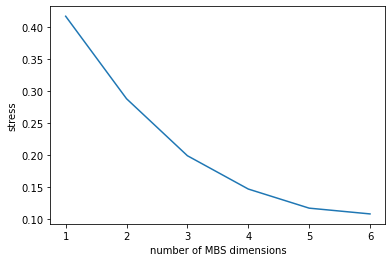

In [105]:
from sklearn.decomposition import PCA

# Make PCA to project MDS data in 2D
def transformPoints(points,n_comp=2):
    if ((points.shape[1] != 2) or (n_comp!=2)):
        # Normalise data
        for i in range(len(points[1,:])):
            points[:,i] = (points[:,i] - np.mean(points[:,i])) / np.std(points[:,i])

        pca = PCA(n_components=n_comp)
        points = pca.fit_transform(points)
        #print("%f variance explained when plotting" %sum(pca.explained_variance_ratio_[:n_comp]))
    return points

# Show MDS scaling
import matplotlib.patches as mpatches

def plotPoints(points,projection=False,title='Ground truth'):
    if (points.shape[1] != 1):
        ax = plt.axes([1.2,0,1.2,1.2])
        ax.set_aspect(aspect='equal')
        if (projection):
            points = transformPoints(points)

        for i in range(len(points)):
            ax.annotate(i,(points[i,0],points[i,1]),xytext=(points[i,0]+np.max(points)/20,points[i,1]))

        plt.scatter(points[narrative,0],points[narrative,1],color='blue',s=145,label='NA')
        plt.scatter(points[stimulus,0],points[stimulus,1],color='red',s=145,label='SSA')
    else:
        plt.scatter(points[narrative],np.zeros((len(narrative),1)),marker='x',color='blue')
        plt.scatter(points[stimulus],np.zeros((len(stimulus),1)),marker='x',color='red')
        orderedSubjectPlot = np.argsort(points.T)
        for i in range(len(points)):
            subj = orderedSubjectPlot[0,i]
            plt.annotate(subj,(points[subj,0],0),xytext=(points[subj,0]-((i+1)%2+1)*np.max(points)/35,0.01*(i%2)-0.0065))
        
    NA = mpatches.Patch(color='blue', label='NA')
    SSA = mpatches.Patch(color='red', label='SSA')
    plt.legend(handles=[NA,SSA])
    
    plt.title(title)
    
# Shepard diagram
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import euclidean_distances

def shepardDiagram(distance_matrix,points,disparities,title=''):
    ax = plt.axes([0,0,1.2,1.2])
    #ax.set_aspect(aspect='equal')
    
    order = np.lexsort((np.ravel(distance_matrix),np.ravel(disparities)))

    computedDistances = pdist(points);
    computedDistances = squareform(computedDistances);
    computedDistances = euclidean_distances(points)

    plt.scatter(np.ravel(distance_matrix),np.ravel(computedDistances))
    plt.plot(np.ravel(distance_matrix)[order],np.ravel(disparities)[order],'r.')
    plt.xlabel('Dissimilarities')
    plt.ylabel('Distances/Disparities')
    plt.title(title)
    corr = np.corrcoef(np.ravel(computedDistances),np.ravel(disparities))
    return corr[1,0]

# Find best MDS dimension
stress = np.zeros((int(N/4),1)) # dimension rule : dimension < N/4 
distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
for i in range(1,int(N/4)+1):
    points,stress[i-1],disparities = computeMDSCoordinate(distance_matrix,i,random_state=1)

plt.plot(np.arange(1,int(N/4)+1),stress)
plt.xlabel("number of MBS dimensions")
plt.ylabel("stress")

# EEG : 6
# EDA : 3 or 4
mdsDim = 6


### mMDS results

In [106]:
def compareMDS(mds_dim,metric):
    if (metric):
        meth = 'Metric MDS'
    elif (metric==False):
        meth = 'Non metric MDS'
    
    plt.figure()
    distance_matrix = computeDistanceMatrix(1,addCoef=0,keepDiag=True)
    points,stress,disparities = computeMDSCoordinate(distance_matrix,mds_dim,random_state=1,printStress=True,metric=metric,max_iter=1000)
    corrCoef = shepardDiagram(distance_matrix,points,disparities,'%s shepard diagram' %meth)
    title = '%s original distance matrix' %meth
    print(title)
    print("Correlation coefficient %f" %corrCoef)
    plotPoints(points,projection=True,title=title)

    plt.figure()
    distance_matrix = computeDistanceMatrix(45,addCoef=0,keepDiag=False)
    points,stress,disparities = computeMDSCoordinate(distance_matrix,mds_dim,random_state=1,printStress=True,metric=metric,max_iter=1000)
    corrCoef = shepardDiagram(distance_matrix,points,disparities,'%s shepard diagram' %meth)
    title = '%s map (normCoef equivalent to keep diagonal)' %meth
    print(title)
    print("Correlation coefficient %f" %corrCoef)
    plotPoints(points,projection=True,title=title)
    
    plt.figure()
    distance_matrix = computeDistanceMatrix(1.2,addCoef=0,keepDiag=False)
    points,stress,disparities = computeMDSCoordinate(distance_matrix,mds_dim,random_state=1,printStress=True,metric=metric,max_iter=1000)
    corrCoef = shepardDiagram(distance_matrix,points,disparities,'%s shepard diagram' %meth)
    title = '%s map with normCoef to simulate higher correlations = lower distances' %meth
    print(title)
    print("Correlation coefficient %f" %corrCoef)
    plotPoints(points,projection=True,title=title)

    plt.figure()
    distance_matrix = computeDistanceMatrix(1,addCoef=4,keepDiag=True)
    points,stress,disparities = computeMDSCoordinate(distance_matrix,mds_dim,random_state=1,printStress=True,metric=metric,max_iter=1000)
    corrCoef = shepardDiagram(distance_matrix,points,disparities,'%s shepard diagram' %meth)
    title = '%s map with constant added to have positive eigenValues' %meth
    print(title)
    print("Correlation coefficient %f" %corrCoef)
    plotPoints(points,projection=True,title=title)

    plt.figure()
    distance_matrix = computeDistanceMatrix(1.2,addCoef=4,keepDiag=False)
    points,stress,disparities = computeMDSCoordinate(distance_matrix,mds_dim,random_state=1,printStress=True,metric=metric,max_iter=1000)
    corrCoef = shepardDiagram(distance_matrix,points,disparities,'%s shepard diagram' %meth)
    title = '%s map with constant added and higher correlations' %meth
    print(title)
    print("Correlation coefficient %f" %corrCoef)
    plotPoints(points,projection=True,title=title)

Stress of the method : 0.387492
Metric MDS original distance matrix
Correlation coefficient 0.423069
Stress of the method : 0.387488
Metric MDS map (normCoef equivalent to keep diagonal)
Correlation coefficient 0.423091
Stress of the method : 0.343339
Metric MDS map with normCoef to simulate higher correlations = lower distances
Correlation coefficient 0.622587
Stress of the method : 0.387883
Metric MDS map with constant added to have positive eigenValues
Correlation coefficient 0.422111
Stress of the method : 0.370529
Metric MDS map with constant added and higher correlations
Correlation coefficient 0.513722


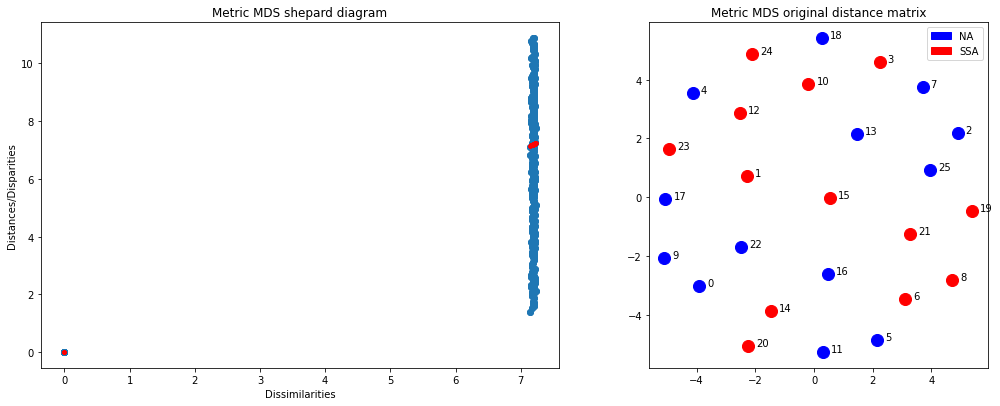

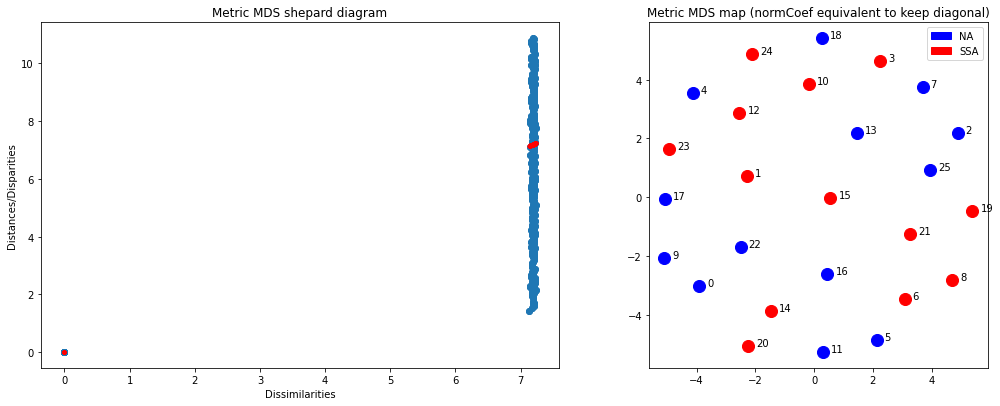

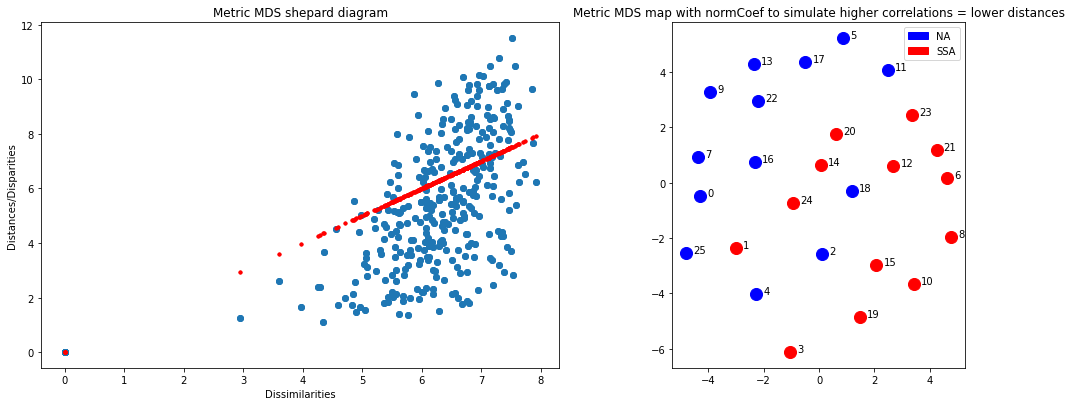

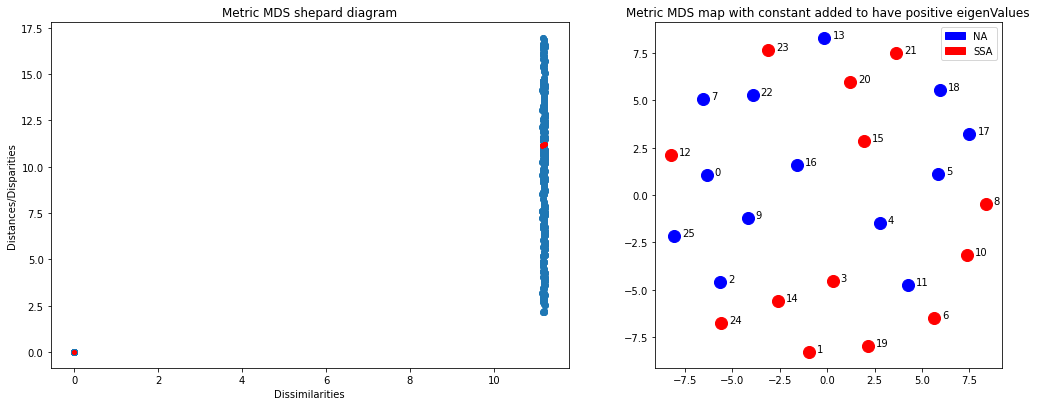

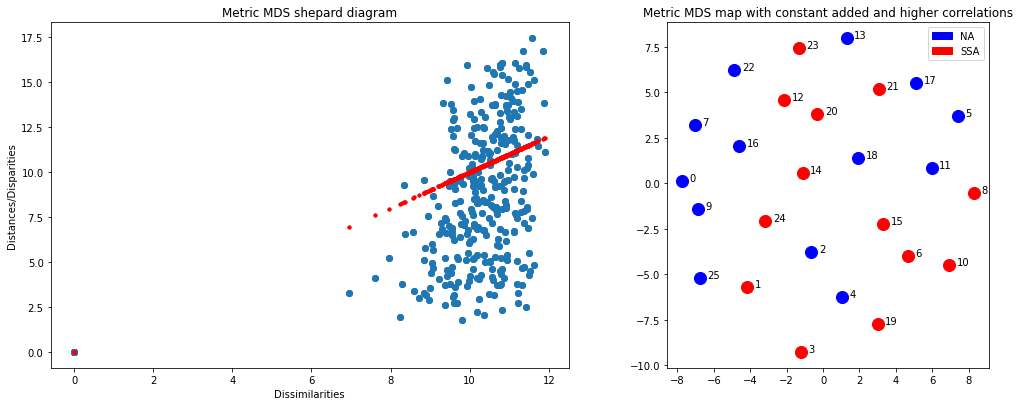

In [107]:
mdsDim = 2
compareMDS(mdsDim,metric=True)

### nMDS results

Stress of the method : 0.288062
Non metric MDS original distance matrix
Correlation coefficient 0.265098
Stress of the method : 0.288062
Non metric MDS map (normCoef equivalent to keep diagonal)
Correlation coefficient 0.265098
Stress of the method : 0.288062
Non metric MDS map with normCoef to simulate higher correlations = lower distances
Correlation coefficient 0.265098
Stress of the method : 0.288062
Non metric MDS map with constant added to have positive eigenValues
Correlation coefficient 0.265098
Stress of the method : 0.288062
Non metric MDS map with constant added and higher correlations
Correlation coefficient 0.265098


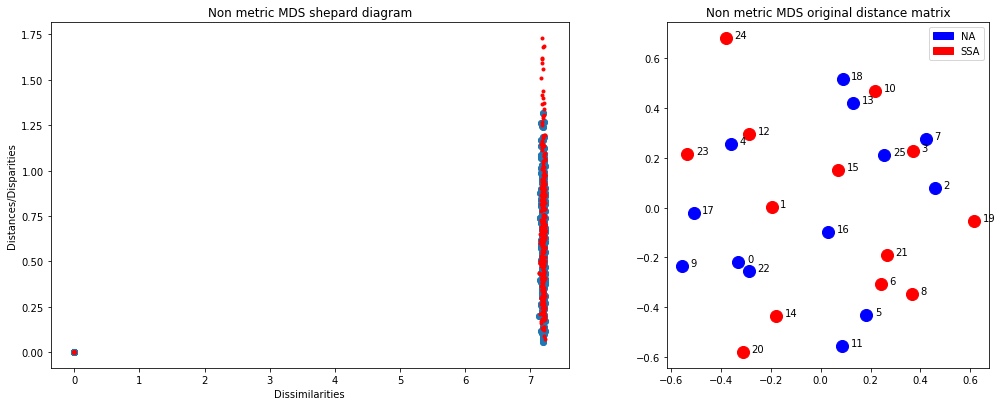

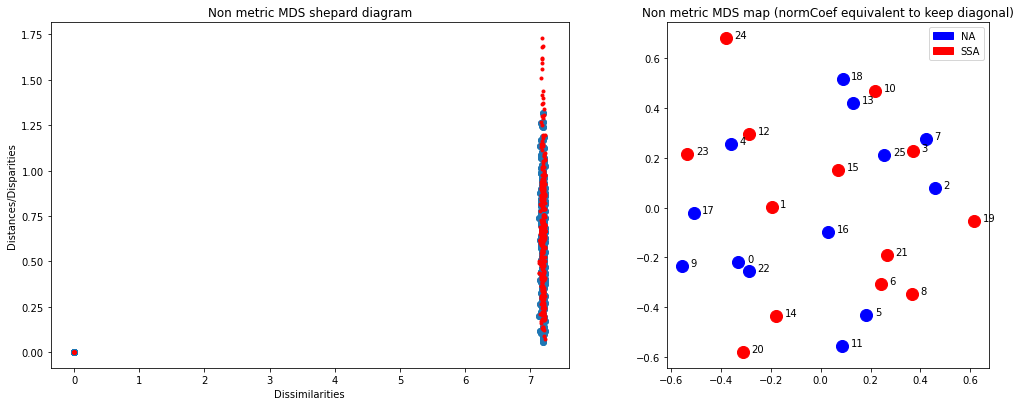

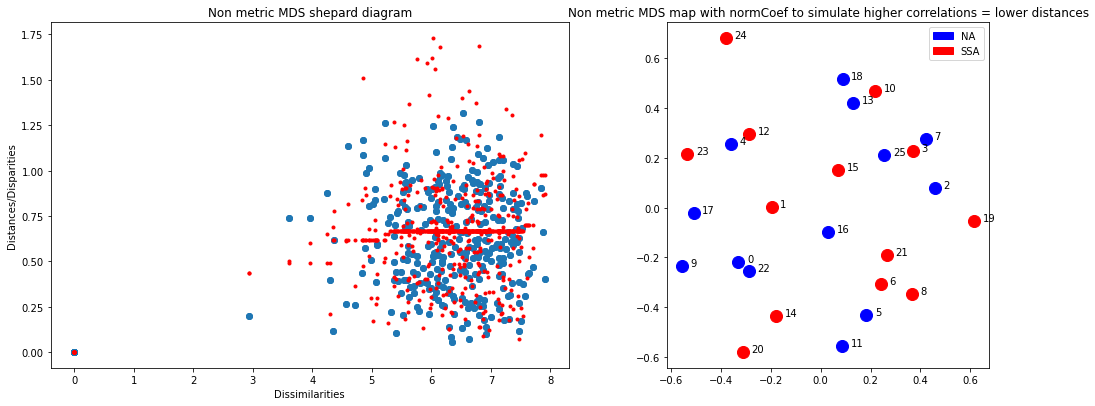

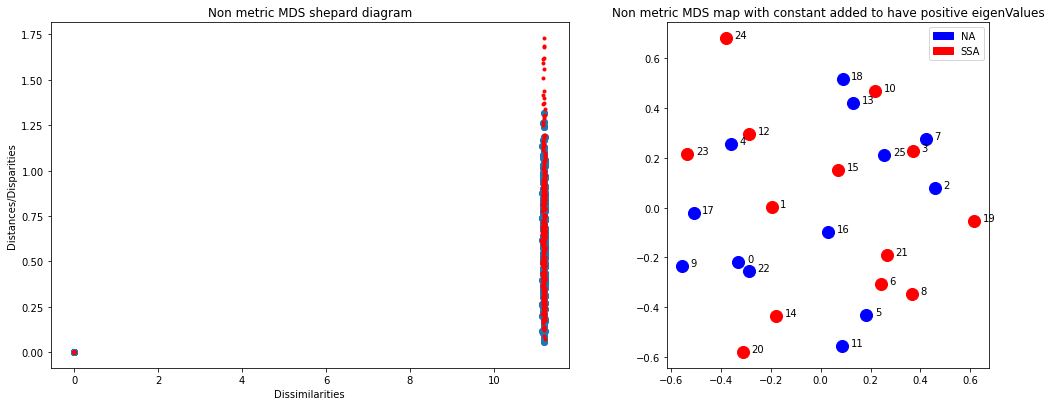

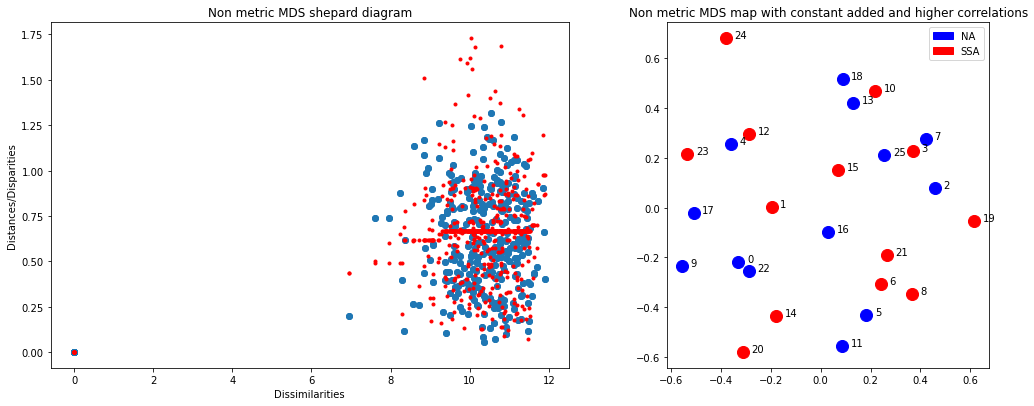

In [100]:
mdsDim = 2
compareMDS(mdsDim,metric=False)

In [108]:
try:
    plt.figure()
    distance_matrix = computeDistanceMatrix(1,addCoef=0,keepDiag=False)
    init = computePCoACoordinate(distance_matrix,n_comp=2)
    '''
    np.random.seed(2)
    init = np.zeros((N,2))
    init[:,0] = np.random.rand(N)
    init[:,1] = np.random.rand(N)
    '''
    points,stress,disparities = computeMDSCoordinate(distance_matrix,mdsDim,printStress=True,metric=True,max_iter=1000,n_init=1,init=init)
    shepardDiagram(distance_matrix,points,disparities,'Metric MDS shepard diagram')
    plotPoints(points,projection=True,title='Metric MDS map (PCoA init)')
except:
    print("run PCoA before")

run PCoA before


<Figure size 432x288 with 0 Axes>

Stress of the method : 0.247688


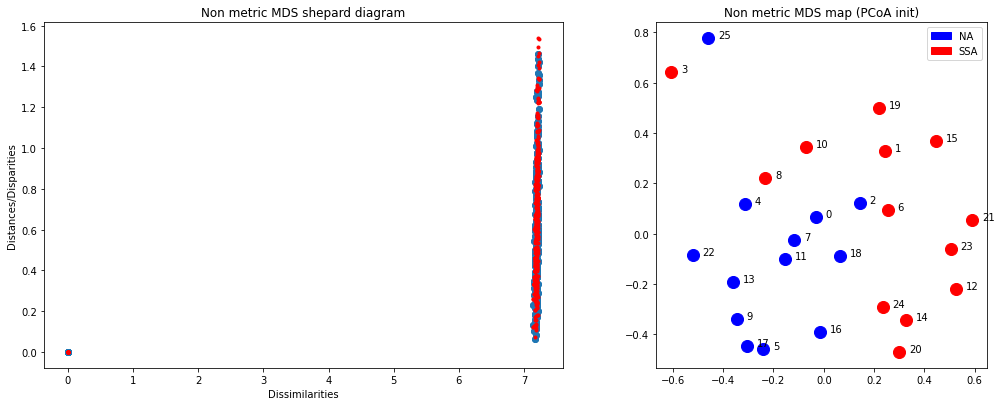

In [109]:
try:
    plt.figure()
    distance_matrix = computeDistanceMatrix(norm_coef,addCoef=0,keepDiag=True)
    init = computePCoACoordinate(distance_matrix,n_comp=2)
    '''
    np.random.seed(2)
    init = np.zeros((N,2))
    init[:,0] = np.random.rand(N)
    init[:,1] = np.random.rand(N)
    '''
    points,stress,disparities = computeMDSCoordinate(distance_matrix,mdsDim,printStress=True,metric=False,max_iter=1000,n_init=1,init=init)
    shepardDiagram(distance_matrix,points,disparities,'Non metric MDS shepard diagram')
    plotPoints(points,projection=True,title='Non metric MDS map (PCoA init)')
except:
    print("run PCoA before")

//anaconda3/lib/python3.7/site-packages/sklearn/manifold/_mds.py:241: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4
  % n_init)


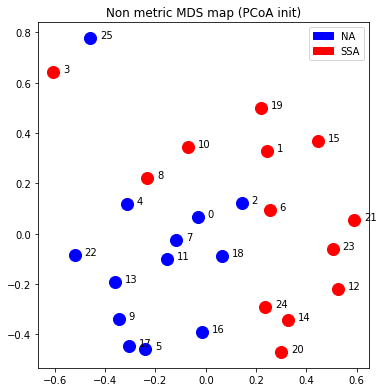

In [103]:
try:
    plotPoints(points,projection=True,title='Non metric MDS map (PCoA init)')
    points = mdsScikit(mdsDim,distance_matrix,dissimilarity='precomputed',random_state=None,init=init,metric=False)
except:
    print("run PCoA before")

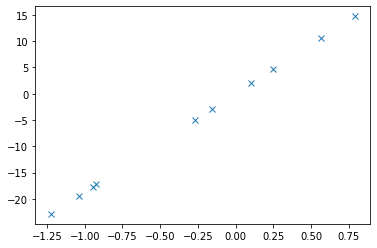

In [104]:
from sklearn.isotonic import IsotonicRegression

#distance_matrix = computeDistanceMatrix(1,addCoef=0)
#X = distance_matrix
#iso_reg = IsotonicRegression().fit(X.flatten(), y)

from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
X, y = make_regression(n_samples=10, n_features=1, random_state=41)
#y += np.random.rand(len(y))
#plt.plot(X,label='X')
#plt.plot(y,label='y')
#plt.legend()
plt.plot(X,y,'x')
iso_reg = IsotonicRegression().fit_transform(X.flatten(), y)
#plt.plot(X,iso_reg)

## Deterministic PCoA = classical MDS

[-646.4047476  -646.55269614 -645.60234107 -650.90233293 -647.70463544
 -647.85486516 -646.46145417 -646.38150261 -647.89184826 -647.06409949
 -647.62214372 -646.81592819 -645.26030718 -646.81823774 -643.5489286
 -646.56475235 -645.40911102 -646.25563142 -644.58845299 -648.18602069
 -645.12225571 -646.11253803 -646.6467305  -646.29676765 -645.49413665
 -648.30316809]
[-16165.20477087    -26.99232291    -26.64759697    -26.51904645
    -26.46289814    -26.2711903     -26.21254752    -26.19439367
    -26.0936757     -26.02331106    -25.97865294    -25.890459
    -25.89023596    -25.80308001    -25.76037601    -25.69287282
    -25.67039642    -25.62787233    -25.57799005    -25.53254879
    -25.49920805    -25.41919329    -25.29879839    -25.25670426
    -25.22258918    -25.12290231]


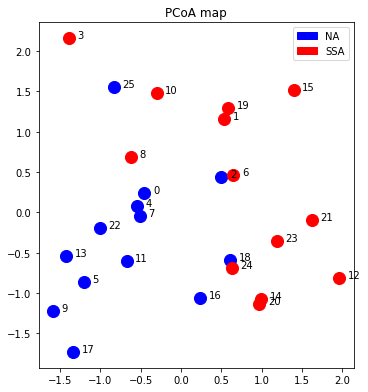

In [110]:
from skbio.stats.ordination import pcoa

def computePCoACoordinate(distance_matrix,n_comp=2):
    
    pcoa_map = pcoa(distance_matrix, method='eigh', number_of_dimensions=n_comp)
    #print(pcoa_map.proportion_explained)
    #print("pcoa proportion explained : %s " %np.sum(pcoa_map.proportion_explained))
    #print("eigen values")
    #print(pcoa_map.eigvals)
    points = np.array(pcoa_map.samples)

    #points = preprocessing.scale(points,axis=1)
    
    #points = transformPoints(distance_matrix)
    return points

distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
points = computePCoACoordinate(distance_matrix,2)
points = transformPoints(points)
plotPoints(points,title='PCoA map')

G = -0.5*np.dot(distance_matrix,distance_matrix)
print(np.diag(G))
values , vectors = np.linalg.eig(G)
print(np.sort(values))

//anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -18.080224852823257 and the largest is 42.692732184495114.
  RuntimeWarning
//anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -9.624903786

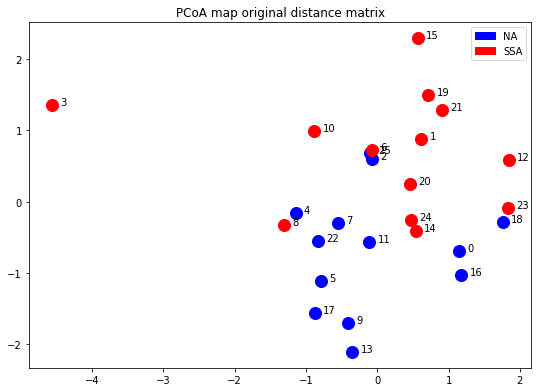

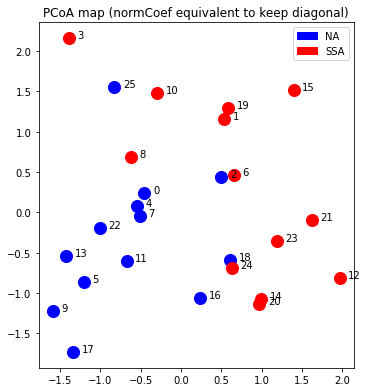

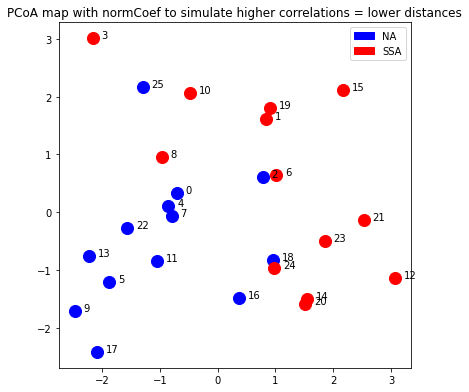

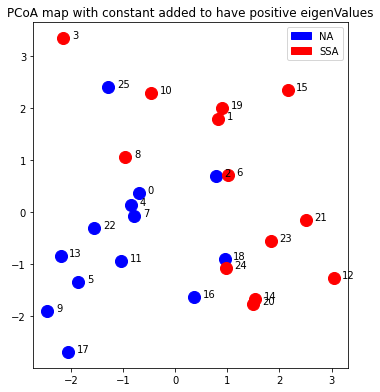

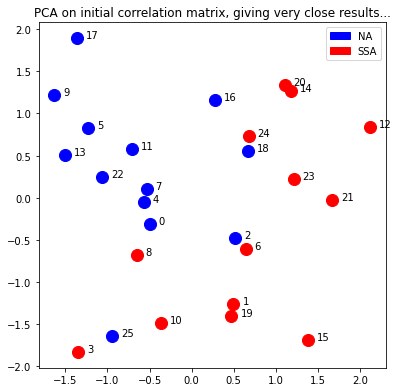

In [124]:
disparities = np.genfromtxt(os.path.join('disparities.csv'),delimiter=',')
disparities = np.array(disparities,dtype='float') # Convert into array

def comparePCoA():
    distance_matrix = computeDistanceMatrix(1,addCoef=0,keepDiag=True)
    distance_matrix = disparities
    points = computePCoACoordinate(distance_matrix,2)
    points = transformPoints(points)
    plotPoints(points,title='PCoA map original distance matrix')

    plt.figure()
    distance_matrix = computeDistanceMatrix(45,addCoef=0,keepDiag=False)
    points = computePCoACoordinate(distance_matrix,2)
    points = transformPoints(points)
    plotPoints(points,title='PCoA map (normCoef equivalent to keep diagonal)')
    
    plt.figure()
    distance_matrix = computeDistanceMatrix(1.2,addCoef=0,keepDiag=False)
    points = computePCoACoordinate(distance_matrix,2)
    points = transformPoints(points)
    plotPoints(points,title='PCoA map with normCoef to simulate higher correlations = lower distances')
    
    plt.figure()
    distance_matrix = computeDistanceMatrix(45,addCoef=4,keepDiag=False)
    points = computePCoACoordinate(distance_matrix,2)
    points = transformPoints(points)
    plotPoints(points,title='PCoA map with constant added to have positive eigenValues')
    
    plt.figure()
    points = transformPoints(np.copy(study_matrix))
    #points = transformPoints(distance_matrix)
    plotPoints(points,title='PCA on initial correlation matrix, giving very close results...')
    
comparePCoA()

### Comparing PCoA and PCA on distance matrix
Giving close results for our matrices, but not in general

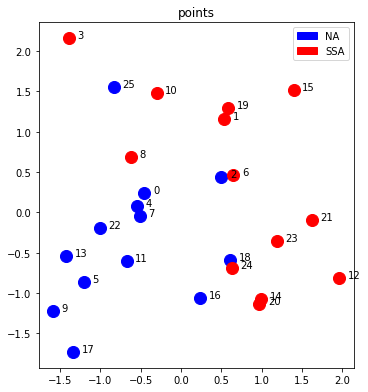

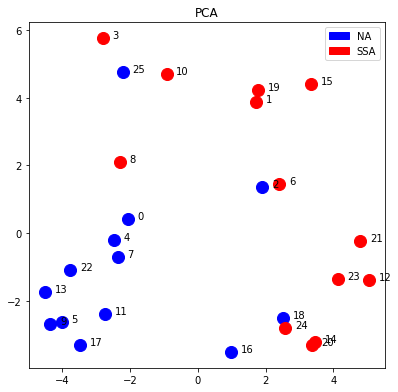

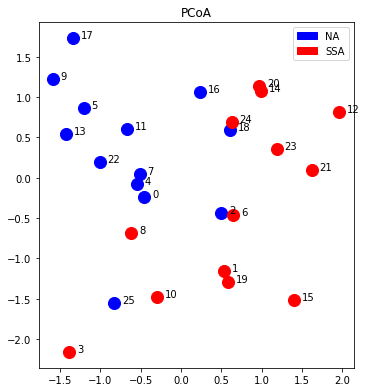

In [112]:
#study_matrix = ISC_EDA
distance_matrix = computeDistanceMatrix(1,addCoef=0,keepDiag=True)
pts = computePCoACoordinate(distance_matrix,2)
#dist = 1-np.eye(N)
#points = computePCoACoordinate(dist,2)
'''
np.random.seed(2)
pts = np.random.rand(N,2)
dist = euclidean_distances(pts)
dist = (dist+dist.T)/2
for i in range(N):
    dist[i,i] = 0
points = computePCoACoordinate(dist,2)
'''
plotPoints(pts,title='points')

dist = euclidean_distances(pts)
dist = (dist+dist.T)/2
#print(dist-dist.T)
newPoints = transformPoints(dist,2)
plt.figure()
plotPoints(newPoints,title='PCA')

dist = euclidean_distances(pts)
dist = (dist+dist.T)/2

newPoints = computePCoACoordinate(dist,2)
plt.figure()
plotPoints(newPoints,title='PCoA')

## t-SNE

//anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -16.707177365875012 and the largest is 73.41850096411318.
  RuntimeWarning


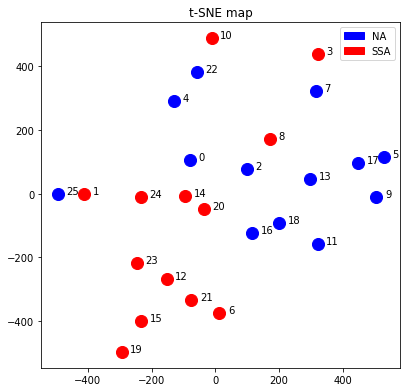

In [122]:
from sklearn.manifold import TSNE

def computeSNECoordinate(distance_matrix,n_pcoa_comp=2,n_tsne_comp=2):
    #points,stress,disparities = computeMDSCoordinate(distance_matrix,mdsDim,dissimilarity='precomputed',printStress=True)
    pcoa_points = computePCoACoordinate(distance_matrix,n_pcoa_comp)
    points_lessD = transformPoints(pcoa_points,n_tsne_comp)
    tsne = TSNE(n_components=n_tsne_comp, perplexity=4, n_iter=3000,metric="precomputed", init=points_lessD)
    #tsne = TSNE(n_components=n_tsne_comp, perplexity=3, n_iter=3000,metric="correlation")
    tsne_points = tsne.fit_transform(distance_matrix)
    #tsne_points = transformPoints(tsne_points)
    #tsne_points = preprocessing.scale(tsne_points,axis=1)
    return tsne_points
    
distance_matrix = computeDistanceMatrix(1.001,addCoef=add_coef,keepDiag=False)
points = computeSNECoordinate(distance_matrix)
plotPoints(points,title='t-SNE map')

## LDA

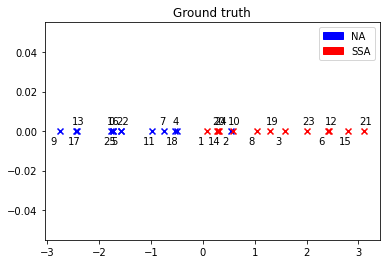

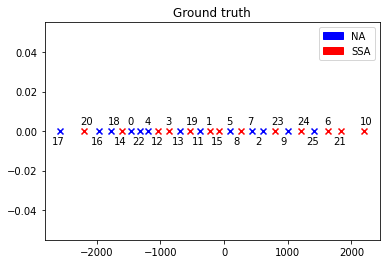

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

dim = 5
distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
points = computePCoACoordinate(distance_matrix,dim)
lda = LinearDiscriminantAnalysis(n_components=1)
points = lda.fit(points, condition).transform(points)
plotPoints(points,'LDA map (not to cluster, just to see data)')

plt.figure()
distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
points = computeSNECoordinate(distance_matrix,dim,1)
plotPoints(points,'t-SNE 1D')

## Semi-supervised dimensionnality reduction

### Ivis

In [74]:
'''
from ivis import Ivis

distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
points,stress,disparities = computeMDSCoordinate(distance_matrix,mdsDim,dissimilarity='precomputed',printStress=True,random_state=1)

# -1 for unlabeled data
try:
    sslLabel = (kmeans_result.robustLabel)*(kmeans_result.label)-1*(kmeans_result.robustLabel==0)
except:
    sslLabel = (kmedoids_result.robustLabel)*(kmedoids_result.label)-1*(kmedoids_result.robustLabel==0)

model = Ivis(embedding_dims=2,k=4,batch_size=7,epochs=30)
pointsIvis = model.fit_transform(points, sslLabel)
'''

"\nfrom ivis import Ivis\n\ndistance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)\npoints,stress,disparities = computeMDSCoordinate(distance_matrix,mdsDim,dissimilarity='precomputed',printStress=True,random_state=1)\n\n# -1 for unlabeled data\ntry:\n    sslLabel = (kmeans_result.robustLabel)*(kmeans_result.label)-1*(kmeans_result.robustLabel==0)\nexcept:\n    sslLabel = (kmedoids_result.robustLabel)*(kmedoids_result.label)-1*(kmedoids_result.robustLabel==0)\n\nmodel = Ivis(embedding_dims=2,k=4,batch_size=7,epochs=30)\npointsIvis = model.fit_transform(points, sslLabel)\n"

In [75]:
'''
## MDS

plotPoints(points,title='MDS map')

ax = plt.axes([0,0,1.2,1.2])
ax.set_aspect(aspect='equal')

for i in range(N):
    ax.annotate(i,(points[i,0],points[i,1]),xytext=(points[i,0]+np.max(points)/20,points[i,1]))

plt.scatter(points[sslLabel==0,0],points[sslLabel==0,1],color='blue',s=145,label='NA')
plt.scatter(points[sslLabel==1,0],points[sslLabel==1,1],color='red',s=145,label='SSA')
plt.scatter(points[sslLabel==-1,0],points[sslLabel==-1,1],color='black',s=145,label='unlabeled')

NA = mpatches.Patch(color='blue', label='labeled NA')
SSA = mpatches.Patch(color='red', label='labeled SSA')
unlabeled = mpatches.Patch(color='black', label='unlabeled')

plt.legend(handles=[NA,SSA,unlabeled])
plt.title('MDS map')

## Compare to Ivis

plt.figure()
plotPoints(pointsIvis,title='Ivis map')

ax = plt.axes([0,0,1.2,1.2])
ax.set_aspect(aspect='equal')

for i in range(N):
    ax.annotate(i,(pointsIvis[i,0],pointsIvis[i,1]),xytext=(pointsIvis[i,0]+np.max(pointsIvis)/20,pointsIvis[i,1]))

plt.scatter(pointsIvis[sslLabel==0,0],pointsIvis[sslLabel==0,1],color='blue',s=145,label='NA')
plt.scatter(pointsIvis[sslLabel==1,0],pointsIvis[sslLabel==1,1],color='red',s=145,label='SSA')
plt.scatter(pointsIvis[sslLabel==-1,0],pointsIvis[sslLabel==-1,1],color='black',s=145,label='unlabeled')

NA = mpatches.Patch(color='blue', label='labeled NA')
SSA = mpatches.Patch(color='red', label='labeled SSA')
unlabeled = mpatches.Patch(color='black', label='unlabeled')

plt.legend(handles=[NA,SSA,unlabeled])
plt.title('Ivis map')
'''

"\n## MDS\n\nplotPoints(points,title='MDS map')\n\nax = plt.axes([0,0,1.2,1.2])\nax.set_aspect(aspect='equal')\n\nfor i in range(N):\n    ax.annotate(i,(points[i,0],points[i,1]),xytext=(points[i,0]+np.max(points)/20,points[i,1]))\n\nplt.scatter(points[sslLabel==0,0],points[sslLabel==0,1],color='blue',s=145,label='NA')\nplt.scatter(points[sslLabel==1,0],points[sslLabel==1,1],color='red',s=145,label='SSA')\nplt.scatter(points[sslLabel==-1,0],points[sslLabel==-1,1],color='black',s=145,label='unlabeled')\n\nNA = mpatches.Patch(color='blue', label='labeled NA')\nSSA = mpatches.Patch(color='red', label='labeled SSA')\nunlabeled = mpatches.Patch(color='black', label='unlabeled')\n\nplt.legend(handles=[NA,SSA,unlabeled])\nplt.title('MDS map')\n\n## Compare to Ivis\n\nplt.figure()\nplotPoints(pointsIvis,title='Ivis map')\n\nax = plt.axes([0,0,1.2,1.2])\nax.set_aspect(aspect='equal')\n\nfor i in range(N):\n    ax.annotate(i,(pointsIvis[i,0],pointsIvis[i,1]),xytext=(pointsIvis[i,0]+np.max(pointsI

In [76]:
distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)


### UMAP

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.]


"\n## Compare to MDS\n\nplotPoints(points,title='MDS map')\n\nax = plt.axes([0,0,1.2,1.2])\nax.set_aspect(aspect='equal')\n\nfor i in range(N):\n    ax.annotate(i,(points[i,0],points[i,1]),xytext=(points[i,0]+np.max(points)/20,points[i,1]))\n\nplt.scatter(points[sslLabel==0,0],points[sslLabel==0,1],color='blue',s=145,label='NA')\nplt.scatter(points[sslLabel==1,0],points[sslLabel==1,1],color='red',s=145,label='SSA')\nplt.scatter(points[sslLabel==-1,0],points[sslLabel==-1,1],color='black',s=145,label='unlabeled')\n\nNA = mpatches.Patch(color='blue', label='labeled NA'\nSSA = mpatches.Patch(color='red', label='labeled SSA')\nunlabeled = mpatches.Patch(color='black', label='unlabeled')\n\nplt.legend(handles=[NA,SSA,unlabeled])\nplt.title('MDS map')\n"

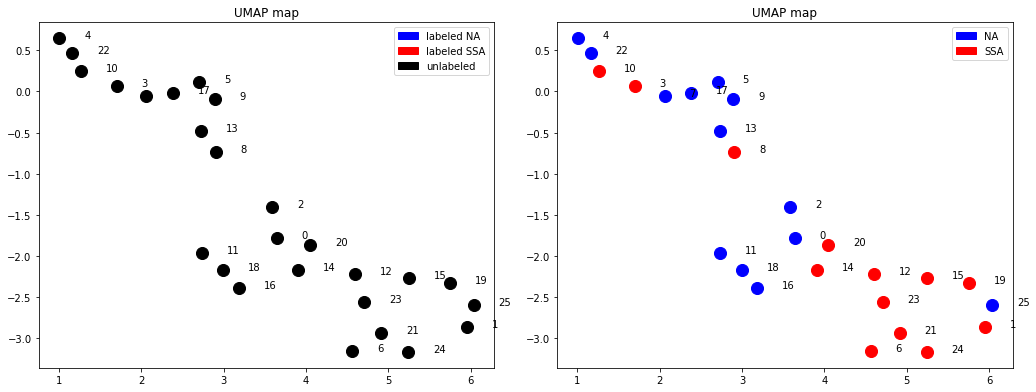

In [148]:
#import sys
#!{sys.executable} -m pip install umap-learn==0.3.10
import umap.umap_ as umap
from sklearn.metrics import pairwise_distances

def computeUMAPCoordinate(distance_matrix,sslLabel=-1*np.ones(N),n_pcoa_comp=2):
    #points = computePCoACoordinate(distance_matrix,2)
    #a = np.arange(0,N,2)
    #sslLabel = -1*np.ones(N)
    #sslLabel[a] = condition[a]
    target_weight = 0.5
    #np.random.seed(42)
    #fitter = umap.UMAP(n_neighbors=3,metric='precomputed',min_dist=0.0,init='spectral',target_weight=target_weight,n_epochs=500).fit(distance_matrix)
    #study_matrix = ISC_EEG
    #for i in range(len(study_matrix)):
    #    study_matrix[i,i] = 300000
    fitter = umap.UMAP(n_neighbors=3,metric='correlation',min_dist=0.0,init='spectral',target_weight=target_weight,n_epochs=5000).fit(study_matrix)
    embedding = fitter.embedding_
    #embedding = transformPoints(embedding)
    #embedding = preprocessing.scale(embedding,axis=0)
    #print(target_weight)
    return embedding
    
ISC_EEG = np.genfromtxt(os.path.join('ISC_EEG.csv'),delimiter=',')
ISC_EEG = np.array(ISC_EEG,dtype='float') # Convert into array
condition = np.genfromtxt(os.path.join('condition.csv'),delimiter=',')
condition = np.array(condition,dtype='int') # Convert into array

removeOutlier = False
if (case == 'EEG'):
    if (removeOutlier): # Remove outliers if there are some
        ISC_EEG = removeOutlierArray(ISC_EEG,1) # Really outlier?
        ISC_EEG = removeOutlierArray(ISC_EEG,5-1) # Really outlier?       
        ISC_EEG = removeOutlierArray(ISC_EEG,9-2) # Really outlier?
        ISC_EEG = removeOutlierArray(ISC_EEG,10-3) # Really outlier?
        ISC_EEG = removeOutlierArray(ISC_EEG,17-4) # Really outlier?
        ISC_EEG = removeOutlierArray(ISC_EEG,22-5) # Really outlier?
        ISC_EEG = removeOutlierArray(ISC_EEG,25-6) # Really outlier?
        
        condition = removeOutlierVector(condition,1) # Really outlier?
        condition = removeOutlierVector(condition,5-1) # Really outlier?       
        condition = removeOutlierVector(condition,9-2) # Really outlier?
        condition = removeOutlierVector(condition,10-3) # Really outlier?
        condition = removeOutlierVector(condition,17-4) # Really outlier?
        condition = removeOutlierVector(condition,22-5) # Really outlier?
        condition = removeOutlierVector(condition,25-6) # Really outlier?
    study_matrix = ISC_EEG
    N = len(study_matrix)
    narrative = np.where(condition == 0)[0]
    stimulus = np.where(condition == 1)[0]
    
'''
for i in range(len(study_matrix)):
    study_matrix[i,i] = np.mean(study_matrix)*100000
distance_matrix = computeDistanceMatrix(1,addCoef=0,keepDiag=True)
#distance_matrix = pairwise_distances(distance_matrix,metric="cosine")
distance_matrix = pairwise_distances(study_matrix,metric="correlation")
study = (1 - distance_matrix)*(np.max(study_matrix)/2)
for i in range(len(study)):
    study[i,i] = 3
distance_matrix = computeDistanceMatrix(1,addCoef=0,keepDiag=True,study_matrix=study)
print(distance_matrix)
'''
#for i in range(len(study_matrix)):
#    study_matrix[i,i] = 3
distance_matrix = computeDistanceMatrix(1,addCoef=0,keepDiag=True)

#print(distance_matrix)
#distance_matrix = np.random.rand(N,N)
#distance_matrix = disparities

# -1 for unlabeled data
try:
    sslLabel = (kmeans_result.robustLabel)*(kmeans_result.label)-1*(kmeans_result.robustLabel==0)
except:
    sslLabel = (kmedoids_result.robustLabel)*(kmedoids_result.label)-1*(kmedoids_result.robustLabel==0)

#a = np.arange(0,N,1)
sslLabel = -1*np.ones(N)
#sslLabel[a] = condition[a]
#sslLabel = (subjects>N/2)
#sslLabel = condition
#sslLabel = np.arange(0,N)

#sslLabel[0] = 1-sslLabel[0]
#sslLabel[0] = -1
print(sslLabel)

points = computeUMAPCoordinate(distance_matrix,sslLabel)

plotPoints(points,title='UMAP map')

removeOutlierPointsBool = False

if (removeOutlierPointsBool):
    if (case == 'EEG'):
        points = removeOutlierPoints(points,1) # Really outlier?
        points = removeOutlierPoints(points,5-1) # Really outlier?       
        points = removeOutlierPoints(points,9-2) # Really outlier?
        points = removeOutlierPoints(points,10-3) # Really outlier?
        points = removeOutlierPoints(points,17-4) # Really outlier?
        points = removeOutlierPoints(points,22-5) # Really outlier?
        points = removeOutlierPoints(points,25-6) # Really outlier?
        
        condition = removeOutlierVector(condition,1) # Really outlier?
        condition = removeOutlierVector(condition,5-1) # Really outlier?       
        condition = removeOutlierVector(condition,9-2) # Really outlier?
        condition = removeOutlierVector(condition,10-3) # Really outlier?
        condition = removeOutlierVector(condition,17-4) # Really outlier?
        condition = removeOutlierVector(condition,22-5) # Really outlier?
        condition = removeOutlierVector(condition,25-6) # Really outlier?
        N = len(condition)
        narrative = np.where(condition == 0)[0]
        stimulus = np.where(condition == 1)[0]
        sslLabel = -1*np.ones(N)
        
    if (points.shape[1] != 1):
        ax = plt.axes([0,0,1.2,1.2])
        ax.set_aspect(aspect='equal')

        for i in range(len(points)):
            ax.annotate(i,(points[i,0],points[i,1]),xytext=(points[i,0]+np.max(points)/20,points[i,1]))

        plt.scatter(points[narrative,0],points[narrative,1],color='blue',s=145,label='NA')
        plt.scatter(points[stimulus,0],points[stimulus,1],color='red',s=145,label='SSA')

else:
    ax = plt.axes([0,0,1.2,1.2])
    ax.set_aspect(aspect='equal')

    for i in range(N):
        ax.annotate(i,(points[i,0],points[i,1]),xytext=(points[i,0]+np.max(points)/20,points[i,1]))

    plt.scatter(points[sslLabel==0,0],points[sslLabel==0,1],color='blue',s=145,label='NA')
    plt.scatter(points[sslLabel==1,0],points[sslLabel==1,1],color='red',s=145,label='SSA')
    plt.scatter(points[sslLabel==-1,0],points[sslLabel==-1,1],color='black',s=145,label='unlabeled')

    NA = mpatches.Patch(color='blue', label='labeled NA')
    SSA = mpatches.Patch(color='red', label='labeled SSA')
    unlabeled = mpatches.Patch(color='black', label='unlabeled')

    plt.legend(handles=[NA,SSA,unlabeled])
    plt.title('UMAP map')

'''
## Compare to MDS

plotPoints(points,title='MDS map')

ax = plt.axes([0,0,1.2,1.2])
ax.set_aspect(aspect='equal')

for i in range(N):
    ax.annotate(i,(points[i,0],points[i,1]),xytext=(points[i,0]+np.max(points)/20,points[i,1]))

plt.scatter(points[sslLabel==0,0],points[sslLabel==0,1],color='blue',s=145,label='NA')
plt.scatter(points[sslLabel==1,0],points[sslLabel==1,1],color='red',s=145,label='SSA')
plt.scatter(points[sslLabel==-1,0],points[sslLabel==-1,1],color='black',s=145,label='unlabeled')

NA = mpatches.Patch(color='blue', label='labeled NA'
SSA = mpatches.Patch(color='red', label='labeled SSA')
unlabeled = mpatches.Patch(color='black', label='unlabeled')

plt.legend(handles=[NA,SSA,unlabeled])
plt.title('MDS map')
'''

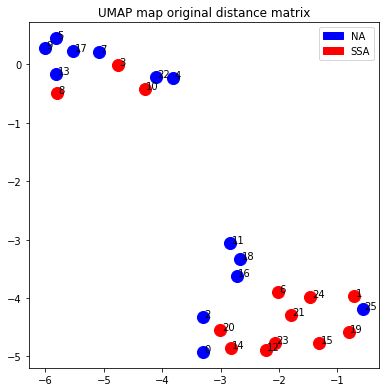

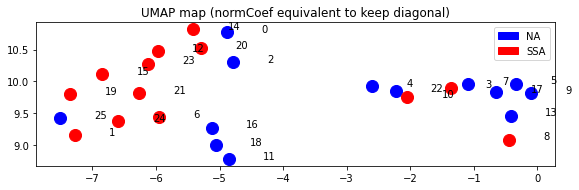

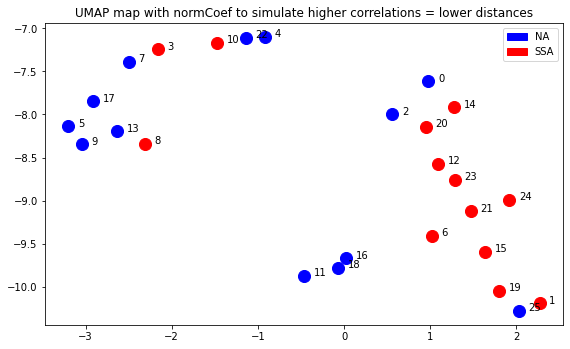

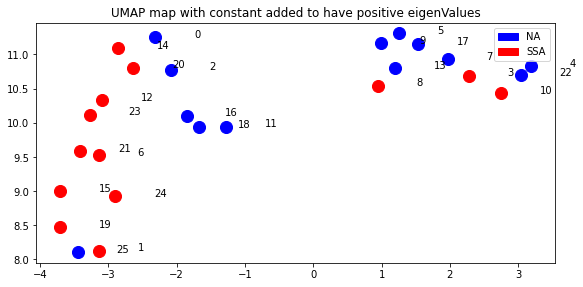

In [149]:
disparities = np.genfromtxt(os.path.join('disparities.csv'),delimiter=',')
disparities = np.array(disparities,dtype='float') # Convert into array

def compareUMAP():
    distance_matrix = computeDistanceMatrix(1,addCoef=0,keepDiag=True)
    distance_matrix = disparities
    points = computeUMAPCoordinate(distance_matrix,sslLabel)
    points = transformPoints(points)
    plotPoints(points,title='UMAP map original distance matrix')

    plt.figure()
    distance_matrix = computeDistanceMatrix(45,addCoef=0,keepDiag=False)
    points = computeUMAPCoordinate(distance_matrix)
    points = transformPoints(points)
    plotPoints(points,title='UMAP map (normCoef equivalent to keep diagonal)')
    
    plt.figure()
    distance_matrix = computeDistanceMatrix(1.2,addCoef=0,keepDiag=False)
    points = computeUMAPCoordinate(distance_matrix)
    points = transformPoints(points)
    plotPoints(points,title='UMAP map with normCoef to simulate higher correlations = lower distances')
    
    plt.figure()
    distance_matrix = computeDistanceMatrix(45,addCoef=4,keepDiag=False)
    points = computeUMAPCoordinate(distance_matrix)
    points = transformPoints(points)
    plotPoints(points,title='UMAP map with constant added to have positive eigenValues')
    
compareUMAP()

## DBSCAN (here with option "precomputed metric" -> array of distances)

In [78]:
from sklearn.cluster import DBSCAN

# Compute DBSCAN
distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
db = DBSCAN(eps=1, min_samples=1,metric='precomputed').fit(distance_matrix)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 26


KeyboardInterrupt: 

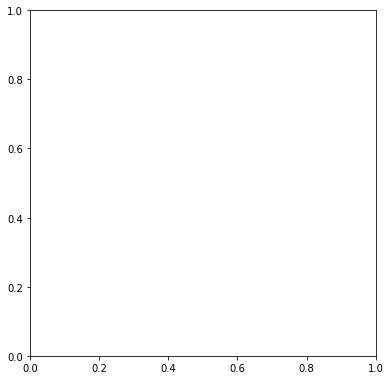

In [79]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

ax = plt.axes([0,0,1.2,1.2])
ax.set_aspect(aspect='equal')
distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
#points,stress,disparities = computeMDSCoordinate(distance_matrix,mdsDim,dissimilarity='precomputed')
#points_lessD = transformPoints(points)
points = computeSNECoordinate(distance_matrix)

for k, col in zip(unique_labels, colors):

    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = points[class_member_mask & core_samples_mask]
    try:
        plt.plot(xy[:, 0], points[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)
    except:
        print("no plot")
    xy = points[class_member_mask & ~core_samples_mask]
    try:
        plt.plot(xy[:, 0], points[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    except:
        print("no plot")
        
plt.title('Estimated number of clusters: %d' % n_clusters_)

# Compare to ground truth
plotPoints(points,projection=True)

## Mean Shift (to do on coordinates)

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Compute clustering with MeanShift
distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
#points = computeSNECoordinate(distance_matrix)
points = computeUMAPCoordinate(distance_matrix,sslLabel)

# Compare to ground truth
plotPoints(points,projection=True)

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(points, quantile=0.5) # 0.35 : heuristically found to have 2 clusters

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(points)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# Plot result
from itertools import cycle

ax = plt.axes([0,0,1.2,1.2])
ax.set_aspect(aspect='equal')
#points = transformPoints(points)

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    print("group %i" %k)
    print(subjects[my_members])
    cluster_center = cluster_centers[k]
    ax.scatter(points[my_members, 0], points[my_members, 1], s=145)
    
    subjects = np.arange(0,N)
    for i in subjects[my_members==1]:
        ax.annotate(i,(points[i,0],points[i,1]),xytext=(points[i,0]+np.max(points)/20,points[i,1]))
    
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    
print("NA")
print(narrative)
print("SSA")
print(stimulus)

## 2-cluster methods

### K-Means

In [ ]:
from sklearn.cluster import KMeans

nRun = 10
random_init = False
mds_random_init = False # MDS with several random init
nMDSRun = 50 # Number of mds runs with different random init if mds_random_init True
compute = True

if (compute):
    # coefficients = np.linspace(1,45,2)
    coefficients = [45] # Changing normalisation coefficient does not change mapping if add_coef large enough 
                        # (2 is ok for that and for only positive eigen values EEG)

    kmeans_result = MapMethodResults("k-means",random_init)
    if (random_init): # Make several runs
        if (mds_random_init): # MDS  
            kmeans = KMeans(n_clusters=2,n_init=1)
            kmeans_result.applyMethodAndMDSAverages(kmeans,dim=2,coef=norm_coef,n_run=nRun,n_mds_run=nMDSRun) # 2D max I think, otherwise curse of dimensionnality
        else:
            kmeans = KMeans(n_clusters=2,n_init=1)
            kmeans_result.applyMethodAverage(kmeans,dim=2,coef=norm_coef,n_run=nRun) # 2D max I think, otherwise curse of dimensionnality
    else: # Compare effect of normalization and dimension
        # kmeans = KMeans(n_clusters=2,n_init=1) # init array used before fit
        kmeans = KMeans(n_clusters=2,n_init=100)
        kmeans_result.applyMethod(kmeans,dim=[-2]) # 2D max I think, otherwise curse of dimensionnality

In [ ]:
# Show results

if (compute):
    if (random_init==False):
        kmeans_result.clusteringAccuracyWithDimension()
    kmeans_result.twoClustersMethodResult()
    kmeans_result.showResultMap()
    plotPoints(kmeans_result.best_points)
    #plt.scatter(kmeans.init[:,0],kmeans.init[:,1],s=200,marker='x') # if t-SNE and 1 coef
    print("DB index : %f " %kmeans_result.dbScore())
    kmeans_result.writeProbaLabel()
    if 'k-means' not in methodUsed:
        accuracyVect = np.append(accuracyVect,kmeans_result.best_accuracy)
        SCVect = np.append(SCVect,kmeans_result.SC)
        methodUsed = np.append(methodUsed,'k-means')
        prior = np.append(prior,('t-SNE')*(kmeans_result.best_dim==7)+('PCoA '+str(abs(dim)))*(kmeans_result.best_dim<0)+('MDS '+str(dim))*(kmeans_result.best_dim<7)*(kmeans_result.best_dim>0))
        
probaLabel = np.array([0.356, 0.643 ,0.589, 0.422, 0.425, 0.331, 0.762, 0.338, 0.434, 0.229, 0.499, 0.334
, 0.829 ,0.237, 0.755, 0.79,  0.413, 0.265 ,0.616 ,0.707, 0.753 ,0.827 ,0.322 ,0.783
, 0.67 , 0.442])
print("norm : %f" %np.linalg.norm(probaLabel-kmeans_result.probaLabel))
print("norm : %f" %np.linalg.norm(probaLabel-(1-kmeans_result.probaLabel)))

print(len(kmeans_result.allLabel))


### Hierarchical clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef,uncondensed=True,keepDiag=True)
points = computePCoACoordinate(distance_matrix,2)
distance_matrix = euclidean_distances(points)
distance_matrix = ssd.squareform(distance_matrix,checks=False)
Z=linkage(distance_matrix,'ward','euclidean',optimal_ordering=True)
threshold = 6*(case!='EDA')+6*(case=='EDA') # 6 EEG if keepDiag==True
#threshold = 3.55
dendrogram(Z, color_threshold=threshold)
plt.show()

print("Found clusters ")
label = (fcluster(Z, t=threshold, criterion='distance')-1)
label_HC = label
print(label)
print("True clusters ")
print(condition)

subjects = np.arange(0,N)
wellClassified = subjects[label==condition]
wrongClassified = subjects[label!=condition]
SSA_HC = subjects[label==1] # Maybe NA
NA_HC = subjects[label==0] # Maybe SSA
print("Well classified")
print(wellClassified)
print("Wrong classified")
print(wrongClassified)
accuracy = len(wellClassified)/N
print("Accuracy : %f" %accuracy)
#[ 0  2  3  7  8 10 16 18 25]
distance_matrix = computeDistanceMatrix(norm_coef,addCoef=add_coef)
SC = silhouetteCoef(distance_matrix,label)
print("Silhouette coefficient : %0.3f" %SC)
if 'HC' not in methodUsed:
    accuracyVect = np.append(accuracyVect,accuracy)
    SCVect = np.append(SCVect,SC)
    methodUsed = np.append(methodUsed,'HC')
    prior = np.append(prior,'dist')

### Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

compute = True
random_init = True
mds_random_init = True

if (compute):
    # coefficients = np.linspace(1,45,2)
    coefficients = [45] # Changing normalisation coefficient does not change mapping if add_coef large enough 
                        # (2 is ok for that and for only positive eigen values EEG)

    spectralClustering_result = MapMethodResults("spectral clustering",random_init)
    gamma = 1
    if (random_init): # Make several runs
        if (mds_random_init): # MDS        
            spectralClustering = SpectralClustering(n_clusters=2,n_init=1,gamma=gamma)
            #[ 1  3  6  8 10 16]
            spectralClustering_result.applyMethodAndMDSAverages(spectralClustering,dim=2,coef=norm_coef,n_run=nRun,n_mds_run=nMDSRun) # 2D max I think, otherwise curse of dimensionnality
        else: # PCoA or t-SNE
            spectralClustering = SpectralClustering(n_clusters=2,n_init=1,gamma=gamma)
            spectralClustering_result.applyMethodAverage(spectralClustering,dim=2,coef=norm_coef,n_run=nRun) # 2D max I think, otherwise curse of dimensionnality
    else: # Compare effect of normalization and dimension
        spectralClustering = SpectralClustering(n_clusters=2, n_init=1000,gamma=gamma)
        spectralClustering_result.applyMethod(spectralClustering,dim=[-2]) # 2D max I think, otherwise curse of dimensionnality

In [ ]:
# Show results
# ward HC : [ 0  2  3  7  8 10 16 18 25]
if (compute):
    if (random_init==False):
        spectralClustering_result.clusteringAccuracyWithDimension()
    spectralClustering_result.twoClustersMethodResult()
    spectralClustering_result.showResultMap()
    plotPoints(spectralClustering_result.best_points)
    print("DB index : %f " %spectralClustering_result.dbScore())
    spectralClustering_result.writeProbaLabel()
    if 'SC_map' not in methodUsed:
        accuracyVect = np.append(accuracyVect,spectralClustering_result.best_accuracy)
        SCVect = np.append(SCVect,spectralClustering_result.SC)
        methodUsed = np.append(methodUsed,'SC_map')
        prior = np.append(prior,('t-SNE')*(spectralClustering_result.best_dim==7)+('PCoA '+str(abs(dim)))*(spectralClustering_result.best_dim<0)+('MDS '+str(dim))*(spectralClustering_result.best_dim<7)*(spectralClustering_result.best_dim>0))

### GMM

In [ ]:
from sklearn.mixture import GaussianMixture

compute = True
random_init = False
mds_random_init = False

if (compute):
    # coefficients = np.linspace(1,45,2)
    coefficients = [45] # Changing normalisation coefficient does not change mapping if add_coef large enough 
                        # (2 is ok for that and for only positive eigen values EEG)

    gmm_result = MapMethodResults("gaussian mixture",random_init)
    if (random_init): # Make several runs
        if (mds_random_init): # MDS  
            gmm = GaussianMixture(n_components=2,n_init=1)
            gmm_result.applyMethodAndMDSAverages(gmm,dim=2,coef=norm_coef,n_run=nRun,n_mds_run=nMDSRun) # 2D max I think, otherwise curse of dimensionnality
        else:
            gmm = GaussianMixture(n_components=2,n_init=1)
            gmm_result.applyMethodAverage(gmm,dim=2,coef=norm_coef,n_run=nRun) # 2D max I think, otherwise curse of dimensionnality
    else: # Compare effect of normalization and dimension
        gmm = GaussianMixture(n_components=2, n_init=1000)
        gmm_result.applyMethod(gmm,dim=[-2]) # 2D max I think, otherwise curse of dimensionnality

In [ ]:
# Show results

if (compute):
    if (random_init==False):
        gmm_result.clusteringAccuracyWithDimension()
    gmm_result.twoClustersMethodResult()
    gmm_result.showResultMap()
    plotPoints(gmm_result.best_points)
    print("DB index : %f " %gmm_result.dbScore())
    gmm_result.writeProbaLabel()
    if 'GMM' not in methodUsed:
        accuracyVect = np.append(accuracyVect,gmm_result.best_accuracy)
        SCVect = np.append(SCVect,gmm_result.SC)
        methodUsed = np.append(methodUsed,'GMM')
        prior = np.append(prior,('t-SNE')*(gmm_result.best_dim==7)+('PCoA '+str(abs(dim)))*(gmm_result.best_dim<0)+('MDS '+str(dim))*(gmm_result.best_dim<7)*(gmm_result.best_dim>0))


## Semi-supervised learning (SSL)

### Label propagation

In [ ]:
from sklearn.semi_supervised import LabelPropagation

compute = True
mds_random_init = False

if (compute):
    # coefficients = np.linspace(1,45,2)
    coefficients = [45] # Changing normalisation coefficient does not change mapping if add_coef large enough 
                        # (2 is ok for that and for only positive eigen values EEG)

    # -1 for unlabeled data
    '''
    try:
        sslLabel = (kmeans_result.robustLabel)*(kmeans_result.label)-1*(kmeans_result.robustLabel==0)
    except:
        sslLabel = (kmedoids_result.robustLabel)*(kmedoids_result.label)-1*(kmedoids_result.robustLabel==0)
    '''
    sslLabel = (kmedoids_result.robustLabel)*(kmedoids_result.label)-1*(kmedoids_result.robustLabel==0)
    
    labelPropagation_result = MapMethodResults("Label propagation",random_init,sslLabel=sslLabel)
    if (mds_random_init): # Make several MDS runs
        labelPropagation = LabelPropagation(n_neighbors=4,max_iter=10000)
        labelPropagation_result.applyMethodAndMDSAverages(labelPropagation,dim=2,coef=norm_coef,n_run=nRun,n_mds_run=nMDSRun) # 2D max I think, otherwise curse of dimensionnality
    else: # Compare effect of normalization and dimension
        labelPropagation = LabelPropagation(n_neighbors=4,max_iter=10000)
        labelPropagation_result.applyMethod(labelPropagation,dim=[1,2,7]) # 2D max I think, otherwise curse of dimensionnality

In [ ]:
# Show results

if (compute):
    if (random_init==False):
        labelPropagation_result.clusteringAccuracyWithDimension()
    labelPropagation_result.twoClustersMethodResult()
    labelPropagation_result.showResultMap()
    plotPoints(labelPropagation_result.best_points)
    print("DB index : %f " %labelPropagation_result.dbScore())
    # kmeans robust [ 0  4  5  6  9 11 12 13 19 21 22 23 24]
    if 'label propagation' not in methodUsed:
        accuracyVect = np.append(accuracyVect,labelPropagation_result.best_accuracy)
        SCVect = np.append(SCVect,labelPropagation_result.SC)
        methodUsed = np.append(methodUsed,'label propagation')
        prior = np.append(prior,('t-SNE')*(labelPropagation_result.best_dim==7)+('PCoA '+str(dim))*(labelPropagation_result.best_dim<7))    

### Label spreading

In [ ]:
from sklearn.semi_supervised import LabelSpreading

compute = True

if (compute):
    # coefficients = np.linspace(1,45,2)
    coefficients = [45] # Changing normalisation coefficient does not change mapping if add_coef large enough 
                        # (2 is ok for that and for only positive eigen values EEG)

    # -1 for unlabeled data
    '''
    try:
        sslLabel = (kmeans_result.robustLabel)*(kmeans_result.label)-1*(kmeans_result.robustLabel==0)
    except:
        sslLabel = (kmedoids_result.robustLabel)*(kmedoids_result.label)-1*(kmedoids_result.robustLabel==0)
    '''
    sslLabel = (kmedoids_result.robustLabel)*(kmedoids_result.label)-1*(kmedoids_result.robustLabel==0)
    
    labelSpreading_result = MapMethodResults("Label spreading",random_init,sslLabel=sslLabel)
    if (mds_random_init): # Make several MDS runs
        labelSpreading = LabelSpreading(n_neighbors=4,max_iter=10000)
        labelSpreading_result.applyMethodAndMDSAverages(labelSpreading,dim=2,coef=norm_coef,n_run=nRun,n_mds_run=nMDSRun) # 2D max I think, otherwise curse of dimensionnality
    else: # Compare effect of normalization and dimension
        labelSpreading = LabelSpreading(n_neighbors=4,max_iter=10000)
        labelSpreading_result.applyMethod(labelSpreading,dim=[1,2,7]) # 2D max I think, otherwise curse of dimensionnality

In [ ]:
# Show results

if (compute):
    if (random_init==False):
        labelSpreading_result.clusteringAccuracyWithDimension()
    labelSpreading_result.twoClustersMethodResult()
    labelSpreading_result.showResultMap()
    plotPoints(labelSpreading_result.best_points)
    print("DB index : %f " %labelSpreading_result.dbScore())
    # kmeans robust [ 0  4  5  6  9 11 12 13 19 21 22 23 24]
    if 'label spreading' not in methodUsed:
        accuracyVect = np.append(accuracyVect,labelSpreading_result.best_accuracy)
        SCVect = np.append(SCVect,labelSpreading_result.SC)
        methodUsed = np.append(methodUsed,'label spreading')
        prior = np.append(prior,('t-SNE')*(labelSpreading_result.best_dim==7)+('PCoA '+str(dim))*(labelSpreading_result.best_dim<7))    

### COP-Kmeans

In [ ]:
def makePairs(arr, n): 
    # Set to store unique pairs 
    s = []
  
    # Make all possible pairs 
    for i in range(n): 
        for j in range(i+1,n): 
            s.append((arr[i], arr[j]))
  
    return s

must_link0 = subjects[sslLabel==0]
print(must_link0)
must_link0 = makePairs(must_link0, len(must_link0))

must_link1 = subjects[sslLabel==1]
print(must_link1)
must_link1 = makePairs(must_link1, len(must_link1))

must_link = must_link0 + must_link1
print(must_link)

cannot_link = []
for i in range(len(subjects[sslLabel==1])):
    for j in range(len(subjects[sslLabel==0])):
        cannot_link.append((subjects[sslLabel==1][i],subjects[sslLabel==0][j]))

print(cannot_link)

In [ ]:
from COPKmeans import COPKmeans

compute = True
mds_random_init = True
random_init = True
nRun = 10
nMDSRun = 100

if (compute):
    # coefficients = np.linspace(1,45,2)
    coefficients = [45] # Changing normalisation coefficient does not change mapping if add_coef large enough 
                        # (2 is ok for that and for only positive eigen values EEG)

    copkmeans_result = MapMethodResults("COP-Kmeans",random_init)
    if (random_init): # Make several runs
        if (mds_random_init): # MDS  
            copkmeans = COPKmeans(n_clusters=2,must_link=must_link,cannot_link=cannot_link)
            copkmeans_result.applyMethodAndMDSAverages(copkmeans,dim=2,coef=norm_coef,n_run=nRun,n_mds_run=nMDSRun) # 2D max I think, otherwise curse of dimensionnality
        else:
            copkmeans = COPKmeans(n_clusters=2,must_link=must_link,cannot_link=cannot_link)
            copkmeans_result.applyMethodAverage(copkmeans,dim=2,coef=norm_coef,n_run=nRun) # 2D max I think, otherwise curse of dimensionnality
    else: # Compare effect of normalization and dimension
        # copkmeans = COPKmeans(n_clusters=2,n_init=1) # init array used before fit
        copkmeans = COPKmeans(n_clusters=2)
        copkmeans_result.applyMethod(copkmeans,must_link=must_link,cannot_link=cannot_link,dim=[1,2,7]) # 2D max I think, otherwise curse of dimensionnality

In [ ]:
# Show results

if (compute):
    if (random_init==False):
        copkmeans_result.clusteringAccuracyWithDimension()
    copkmeans_result.twoClustersMethodResult()
    copkmeans_result.showResultMap()
    plotPoints(copkmeans_result.best_points)
    #plt.scatter(copkmeans.init[:,0],copkmeans.init[:,1],s=200,marker='x') # if t-SNE and 1 coef
    print("DB index : %f " %copkmeans_result.dbScore())
    if 'COP-Kmeans' not in methodUsed:
        accuracyVect = np.append(accuracyVect,copkmeans_result.best_accuracy)
        SCVect = np.append(SCVect,copkmeans_result.SC)
        methodUsed = np.append(methodUsed,'COP-Kmeans')
        prior = np.append(prior,('t-SNE')*(copkmeans_result.best_dim==7)+('PCoA '+str(dim))*(copkmeans_result.best_dim<7))

## Comparing accuracy and silhouette coefficient

In [ ]:
for meth in np.unique(prior):
    plt.scatter(accuracyVect[prior==meth],SCVect[prior==meth],label=meth) # Hard to compare MDS results because of random init

plt.xlabel("accuracy")
plt.ylabel("silhouette coefficient")
plt.legend()
plt.show()